# Reference

- https://youtu.be/6tdfhlIoxOw?si=2JjIqynk74ARR6tl
- https://youtube.com/playlist?list=PLbGui_ZYuhigchy8DTw4pX4duTTpvqlh6&si=zBD81sCTjZWWVHnv
- https://youtube.com/playlist?list=PLbGui_ZYuhigUfO47FLx4ocfmo1071hlc&si=Hhw0ku7qo7NPc_8w

<pre id='l1'></pre>
# How to start with Django project?

1. Create a folder and name it suitably.
2. Create virtual environment by command: `python -m venv myenv`
3. Activate virtual environment by command: `myenv/Scripts/activate`
4. Install Django using command: `pip install django`
5. Now create django project using command: `django-admin startproject myproject` OR `django-admin startproject myproject .`
6. Navigate inside project directory using command: `cd myproject`
7. Create an app using command: `python manage.py startapp myapp`
8. Open `settings.py`(myproject) and add app in `INSTALLED_APPS` which we can see below
9. Now run server using command: `python manage.py runserver`

In [ ]:
# Step8- myproject/settings.py:

INSTALLED_APPS = [
    'django.contrib.admin',
    'django.contrib.auth',
    'django.contrib.contenttypes',
    'django.contrib.sessions',
    'django.contrib.messages',
    'django.contrib.staticfiles',
    
    'myapp', # OR 'myapp.apps.MyappConfig'
]

**We can runserver at specific port using command:** `python manage.py runserver 6000`

# Object Relational Mapper (ORM)

- Object-Relational Mapper (ORM), which enables application to interact with database such as SQLite, MySQL, PostgreSQL, Oracle.
- ORMs automatically create a database schema from defined classes or models. It generate SQL from Python code for a particular database which means developer do not need to write SQL Code.
- ORM maps objects attributes to respective table fields.
- It is easier to change the database if we use ORMs hence project becomes more portable.
- Django's ORM is just a way to create SQL to query and manipulate your database and get results in a pythonic fashion.
- ORMS use connectors to connect databases with a web application.

# QuerySet
- A QuerySet can be defined as a list containing all those objects we have created using the Django model.
- QuerySets allow you to read the data from the database, filter it and order it.
- Querysets are generally associated with CRUD applications.

<pre id='l2'></pre>
# Creating views & mapping to urls 

**syntax:**

`path(route, view, kwargs=None, name=None)`

- `kwargs` arguments allows you to pass additional arguments to view function or method. It should be dictionary.

There are two ways to create and map urls:

**First Method:**
1. Open `views.py`(myapp) and add following lines of code to create a view in django.
2. Open `urls.py` (myproject) and add following lines of code to create url that map to its corresponding view.
3. `python manage.py runserver`

In [1]:
# Step1- myapp/views.py:

from django.shortcuts import render

# Create your views here.
from django.http import HttpResponse

def myView(request):
    return HttpResponse("Hello this is my first view code")
    
    # we can add HTML tags in our text as well:
    # return HttpResponse("<h1> Hello </h1>")

In [ ]:
# Step2- myproject/urls.py

from django.contrib import admin
from django.urls import path
from myapp import views

urlpatterns = [
    path('admin/', admin.site.urls),
    path('myurl/', views.myView, name='myurl'),  
]

**Second Method:(Recommended)**
1. Open `views.py`(myapp) and add following lines of code to create a view in django.
2. Create a file "urls.py" inside `myapp` folder.
3. Now open `urls.py`(myapp) and add folowing lines of code to create mapping url at app level.
3. Open `urls.py` (myproject) and add following lines of code to map app level url with project level to its corresponding view.
4. `python manage.py runserver`

In [ ]:
# Step1- myapp/views.py:

from django.shortcuts import render

# Create your views here.
from django.http import HttpResponse

def myView(request):
    return HttpResponse("Hello this is my first view code")

def htmlView(request):
    return HttpResponse("<h1> Hello </h1>")

In [ ]:
# Step3- myapp/urls.py

from django.urls import path
from . import views

urlpatterns = [
    path('myurl/', views.myView, name='myurl'), # always use name atribute at app level when following second method
    path('htmlview/', views.htmlView, name='htmlview'),
]

In [ ]:
# Step4- myproject/urls.py

from django.contrib import admin
from django.urls import path, include

urlpatterns = [
    path('admin/', admin.site.urls),
    path('myapp/', include("myapp.urls")),  # Use a different base path
]


Above code works well.

**Here are chances that we may make a small mistake. Lets see that mistake:**

**Remark:** Above approach is correct and will work without any conflicts.

In [ ]:
# Step1- myapp/views.py:

from django.shortcuts import render

# Create your views here.
from django.http import HttpResponse

def home(request):
    return HttpResponse("Hello this is my first view code")

def htmlView(request):
    return HttpResponse("<h1> Hello </h1>")

In [ ]:
# Step3- myapp/urls.py

from django.urls import path
from . import views

urlpatterns = [
    path('', views.home,), 
    path('', views.htmlView,),
]

In [ ]:
# Step4- myproject/urls.py

from django.contrib import admin
from django.urls import path, include

urlpatterns = [
    path('admin/', admin.site.urls),
    path('home/', include("myapp.urls")),
    path('htmlview/', include("myapp.urls")),
]


In above approach there is a confliction. If we have used above code then either we visit "home/" or "htmlview/" content is rendered from "home/" view only due to confliction.

The issue in our code is that both urlpatterns in our `urls.py` (project level) are conflicting. 
Both `path('home/', include("myapp.urls"))` and `path('htmlview/', include("myapp.urls"))` are mapping to the same set of views in `myapp.urls`. As a result, when you access "htmlview/", it is using the view mapped to an empty `path ('')` in your `myapp.urls`, which is the home view.

====================================================================================<hr>

### `name` attribute in urls.py

The `name` attribute in Django URL patterns is used to uniquely identify a URL pattern, and it's often a good practice to use it. It can be useful in various scenarios, such as generating URLs dynamically in templates, reversing URLs in views, and making your code more readable and maintainable.

Here are some considerations for where to use the name attribute:

**At the App Level:**

In [ ]:
# myapp/urls.py

from django.urls import path
from . import views

urlpatterns = [
    path('home/', views.home, name='home'),
    path('htmlview/', views.htmlView, name='htmlview'),
]

**At the Project Level:**
Global Identification: If you have multiple apps within your project and want to have a global identification for URLs, you might choose to use names at the project level. This is especially relevant when combining multiple apps and needing to refer to URLs from different apps.

In [ ]:
# myproject/urls.py

from django.contrib import admin
from django.urls import path, include

urlpatterns = [
    path('admin/', admin.site.urls),
    path('myapp/', include("myapp.urls", namespace='myapp')),  # Using namespace
]

**Combination:**
You can also combine both approaches. Give names at the app level for internal organization and at the project level for global identification.

In [ ]:
# myapp/urls.py
from django.urls import path
from . import views

urlpatterns = [
    path('home/', views.home, name='myapp_home'),
    path('htmlview/', views.htmlView, name='myapp_htmlview'),
]

In [ ]:
# myproject/urls.py
from django.contrib import admin
from django.urls import path, include

urlpatterns = [
    path('admin/', admin.site.urls),
    path('myapp/', include("myapp.urls")),
]

Let’s understand more on second scenario (Project level) that is discussed above. Certainly! Let's create a complete example to demonstrate using names at the project level for global identification when combining multiple apps. In this example, I'll assume there are two apps, myapp1 and myapp2, within the project.

We have our project structure like this:

In [ ]:
myproject/
|-- myproject/
|   |-- settings.py
|   |-- urls.py
|-- myapp1/
|   |-- views.py
|   |-- urls.py
|-- myapp2/
|   |-- views.py
|   |-- urls.py
|-- manage.py

In [ ]:
# myapp1/urls.py

from django.urls import path
from . import views

urlpatterns = [
    path('home/', views.home, name='myapp1_home'),
    path('htmlview/', views.htmlView, name='myapp1_htmlview'),
]

In [ ]:
# myapp2/urls.py

from django.urls import path
from . import views

urlpatterns = [
    path('about/', views.about, name='myapp2_about'),
    path('contact/', views.contact, name='myapp2_contact'),
]

In [ ]:
# myproject/urls.py

from django.contrib import admin
from django.urls import path, include

urlpatterns = [
    path('admin/', admin.site.urls),
    path('myapp1/', include('myapp1.urls', namespace='myapp1')),
    path('myapp2/', include('myapp2.urls', namespace='myapp2')),
]

In [ ]:
# myapp1/views.py

from django.http import HttpResponse

def home(request):
    return HttpResponse("Hello from myapp1 - Home!")

def htmlView(request):
    return HttpResponse("<h1>HTML View from myapp1</h1>")

In [ ]:
# myapp2/views.py

from django.http import HttpResponse

def about(request):
    return HttpResponse("About page from myapp2")

def contact(request):
    return HttpResponse("Contact page from myapp2")

Now, when you want to refer to a URL from either `myapp1` or `myapp2`, you can use the `namespace` provided in the project-level `urls.py`. For example, to reverse the URL for the home view in myapp1 from within another app or view, you can do:

In [ ]:
from django.urls import reverse

url = reverse('myapp1:myapp1_home')

This helps in avoiding naming conflicts and provides a clear global identification for your URLs. Adjust the names and structure according to your specific needs.

===================================================================================<hr>

In Django, a "reverse URL" refers to the process of generating a URL based on the name of a URL pattern and its associated parameters. This is the opposite of the more common process, which is resolving a URL from a given path to find the corresponding view.

The `reverse()` function in Django's django.urls module is used to perform the reverse URL matching. It takes the name of a URL pattern and, optionally, any required parameters and returns the corresponding URL as a string.

**When is `reverse()` used?**

Dynamic URL Generation:

When you have a URL pattern with a name, and you want to dynamically generate URLs in your code instead of hardcoding them.
Useful in templates, views, and other parts of your code where you need to create links to specific views.

Avoiding Hardcoded URLs:

Helps in avoiding hardcoded URLs, which can be error-prone and make your code less maintainable.
Makes it easier to update URLs without changing them in multiple places.

Refactoring and Reusability:
Promotes code modularity and reusability. If you decide to change the URL structure or move a view to a different location, you only need to update the URL configuration, and the rest of your code that uses reverse() remains unchanged.

Example:
Suppose you have the following URL pattern in your `urls.py`:

In [ ]:
# urls.py
from django.urls import path
from . import views

urlpatterns = [
    path('my_view/<int:pk>/', views.my_view, name='my_view'),
]

Now, in your code (e.g., a view or a template), instead of hardcoding the URL, you can use reverse():

In [ ]:
# views.py
from django.urls import reverse
from django.shortcuts import render
from django.http import HttpResponseRedirect

def redirect_to_my_view(request):
    # Assuming 'pk_value' is some dynamic value
    pk_value = 123

    # Using reverse to generate the URL
    url = reverse('my_view', args=[pk_value])

    # Redirecting to the generated URL
    return HttpResponseRedirect(url)

In a template, you can use the {% url %} template tag, which is essentially a shortcut for reverse():

In [ ]:
# <!-- template.html -->
<a href="{% url 'my_view' pk=123 %}">Link to My View</a>

<pre id='l3'></pre>
# Creating dynamic URL

1. Open `urls.py`(myapp) and add following lines of code.
2. Open `views.py`(myapp) and create a mapping url.

In [ ]:
# Step1: myapp/urls.py:
        
from django.urls import path
from . import views

urlpatterns = [
    path('dynamicurl/<str:dish>/', views.showDish, name='dynurl'), # dynamicurl/pasta/
    # path('dynamicurl/<int:dish>/', views.showDish, name='dynurl'), # dynamicurl/12/
    # path('dynamicurl/<slug:dish>/', views.showDish, name='dynurl'), # dynamicurl/this-is-slug-type/
     # path('dynamicurl/<uuid:dish>/', views.showDish, name='dynurl'),
]

In [ ]:
# Step2: myapp/views.py:

from django.shortcuts import render

# Create your views here.
from django.http import HttpResponse

def showDish(request, dish): # 'dish' name should be same as in 'urls.py'
    item={
        'pasta': "this is pasta",
        'cake': "this is cake",
        'tea': "this is tea",
    }
    description=item[dish]
    return HttpResponse(f"<h3>{dish}</h3>:"+description)

<pre id='l3a'></pre>
# Regular expression in urls

Suppose we have been tasked to create a menu item page for the Little Lemon website. The page displays content for each item on the menu. Instead of making a specific page for each menu item, we can define the dynamic URL structure that will pass the menu item ID to the view function. The content of the page will depend on the menu item value pasta to the view function from the URL. Based on the ID value pasta in the URL, the logic in the view function will determine what type of data to display, like a menu item name. The advantage for developers is that they only need to create one page. Instead of creating individual static pages for each menu item, developers only need to create one page whose content updates dynamically based on the values pasta in the URL. 

- Regular expression are a powerful tool that developers use to perform `extraction` and `validation`, `advanced searching`, `group searches`, and `find` and `replace` operations. 

- In django, developers use regular expressions to `define`, `extract` and `validate dynamic URL paths` before they are sent to the associated view function. 

- Sometimes a symbol can be used for one or more purposes or the same symbol can behave differently depending on the case. 

In [ ]:
# myapp/ursl.py:

from django.urls import path, re_path
from . import views

urlpatterns = [
    path('menu_item/10', views.menuDisplay, name='menu'),
    re_path(r'^menu_item/([0-9]{2}/$)', views.menuDisplay, name='menu') # regular expression
]

<pre id='l4'></pre>
# Rendering HTML template and sending data from view to webpage

1. Create a folder "tenplates" inside project(package) folder
2. Open `settings.py`(myproject) and add "templates" in `DIRS` which is inside `TEMPLATES`
3. Open `views.py`(myapp) and create a view that can render html file using respective function and also pass some data
4. Open `urls.py`(myapp) and create URL that map to its corresponding view
5. Now create html file/s inside `template` folder and add following line of code in .html("myhtml.html") file

In [ ]:
# Step2- myproject/settings.py:

TEMPLATES = [
    {
        'BACKEND': 'django.template.backends.django.DjangoTemplates',
        'DIRS': ['templates'], # here add folder name OR os.path.join(BASE_DIR, "tempalates")
        'APP_DIRS': True,
        'OPTIONS': {
            'context_processors': [
                'django.template.context_processors.debug',
                'django.template.context_processors.request',
                'django.contrib.auth.context_processors.auth',
                'django.contrib.messages.context_processors.messages',
            ],
        },
    },
]

In [ ]:
# Step3- myapp/views.py:

from django.shortcuts import render

# Create your views here.

def htmlRender(request):
    data={'name':'My name is django'}
    return render(request, 'myhtml.html', context = data) # context is always pass a dictionary

In [ ]:
# Step4- myapp.urls.py:

from django.urls import path
from . import views


urlpatterns = [
    path('htmlrender/', views.htmlRender, name='template'),
]

In [ ]:
# Step5- templates/myhtml.html:

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Document</title>
</head>
<body>
    <h1>rendering template</h1>
    
    {{name}} # data from views.py
    
</body>
</html>

### templates at app level

We can also create `templates` folder at app level that is inside `myapp` folder and for this approach we don't have to do any change in our `settings.py`(myproject). Only thing that we have to do in this case is to make sure is that `APP_DIRS` variable (in our `settings.py`) inside `TEMPLATES` is set to `True`(by default it is set `True` as well but we have to make sure).

- Lets's say we have two apps `myapp1` and `myapp2` and we are creating `templates` folder inside both apps folder. Let's say both `templates` folder file with same name `base.html` for their specific apps. But this will create a conflict while rendering the `styles.css`. 
- To avoid this conflict we should create another folder inside `templates` folder with name of app.
- So, our folder structure will look like this:

<pre>
myproject/
|-- myproject/
|   |-- settings.py
|   |-- urls.py
|-- myapp1/
|   |-- templates/myapp1/
|   |             |-- base.html
|   |-- views.py
|   |-- urls.py
|-- myapp2/
|   |-- templates/myapp2/
|   |             |-- base.html
|   |-- views.py
|   |-- urls.py
|-- manage.py
</pre>

**Remark:** We can create `templates` folder at project level and at app level at same time. And for that `settings.py`(myproject) will be updated accordingly likewise we were doing it separately at project level and app level.

<pre id='l4a'></pre>
# Best practices to maintain templates inside the project

Each approach has its pros and cons, and industry practices may vary. Let's explore each approach:

### Project-Level Templates:

`Pros:`
- Centralized location for templates.
- Common templates shared across multiple apps can be easily managed.

`Cons:`
- May become cluttered and less maintainable as the project grows.
- Harder to maintain modularity and reuse.

**Recommendation:** Use this approach for smaller projects where the number of templates is limited, and centralization is not a concern.

### App-Level Templates:

`Pros:`
- Templates are kept close to the corresponding app, enhancing modularity.
- Easier to reuse apps in other projects with their templates.

`Cons:`
- Can lead to duplication of templates if multiple apps have similar functionality.
- Collaboration across multiple apps might become challenging.

**Recommendation:** Suitable for medium-sized projects with distinct apps that can function independently. This approach can help maintain modularity and improve app portability.

### Combining Project and App-Level Templates:

`Pros:`
- Achieves a balance between centralization and modularity.
- Shared templates can be placed at the project level, while app-specific templates remain in their respective apps.

`Cons:`
- Requires thoughtful organization to avoid confusion and maintain clarity.

**Recommendation:** This is often considered a good compromise, especially in larger projects. Shared templates can be kept at the project level, while app-specific templates reside within the apps.

<br>

**Best Practices:**

`Consistent Naming:` Regardless of the approach, maintain a consistent naming convention for templates to enhance readability.

`Template Loading Order:` Understand Django's template loading order. Templates in the app directory take precedence over those at the project level. This can be crucial when resolving template conflicts.

**Conclusion:**

The best approach depends on the specific needs of your project. For small projects, a project-level approach may be sufficient. As the project grows, consider a combination of project and app-level templates to balance centralization and modularity. It's also essential to document your chosen approach for the benefit of the development team and future maintainers.

<pre id='l5'></pre>
# Django template tags

### variables:

In django we can render variable inside `{{}}`. Example

In [ ]:
# templates/myhtml.html:

<p> # can be any tag or without tag

    {{variable_name}} # rendering variable

    {% with fname="ramesh" lname="kumar" %} # creating variable
    
    <div> {{fname}} {{lname}} </div>
    
    {% endwith %} # end scope of varaible fname, lname
</p>

### condtional statements: if, elif, else

In [ ]:
# templates/myhtml.html:

<p> # can be any tag or without tag

    {% if a==1 %}
    <h1>hello</h1>
    
    {% elif a==0 %}
    <h1>bye</h1>
    
    {% else a==0 %}
    <h1>wait</h1>
    
    {% endif %} # end of contional block

</p>

### for loop:

In [ ]:
# myapp/views.py:

def viewFunction(request):
    data = {
        'title':'My title',
        'my_list':['apple', 'mango', 'guava'],
        'my_dictionary':[
            {'brand':'MS', 'model':'Alto'},
            {'brand':'Mahindra', 'model':'Scorpio'}
        ]
    }
    
    return render(request, 'myhtml.html', context = data)

In [ ]:
# templates/myhtml.html:

<p> # can be any tag or without tag
    
    {{title}}
    
    # 'my_list':[1,2,3,4]
    {% for item in my_list %} 
    <h1>{{item}}</h1>
    {% endfor %}
    
    # 'my_dictionary':[{'brand':'MS', 'model':'Alto'},{'brand':'Mahindra', 'model':'Scorpio'}]
    {% for item in my_dictionary %} 
    <h1>{{item.brand}}</h1>
    <h1>{{item.model}}</h1>
    {% endfor %}
    
</p>

In [ ]:
# templates/myhtml.html:

<p> # can be any tag or without tag

    {% for item in my_list reversed %} # reverse for loop
    <h1>{{item}}</h1>
    {% endfor %}
    
</p>

In [ ]:
# templates/myhtml.html:

<p> # can be any tag or without tag

    {% for item in my_list %} # my_list=[1,2,3,4]
    
    <h1>{{forloop.counter}} {{item}}</h1> # counting start from 1
    
    <h1>{{forloop.counter0}} {{item}}</h1> # counting start from 0
    <h1>{{forloop.revcounter}} {{item}}</h1> 
    <h1>{{forloop.first}} {{item}}</h1> # True if this is first time through loop
    <h1>{{forloop.last}} {{item}}</h1> # True if this is last time through loop
    
    {% endfor %}
    
    
    
</p>

### empty:

`empty` keyword is used when we want to do something special if object is empty

In [ ]:
# templates/myhtml.html:

<p> # can be any tag or without tag

    # 'my_dictionary':[{'brand':'MS', 'model':'Alto'},{'brand':'Mahindra', 'model':'Scorpio'}]
    {% for item in my_dictionary %} 
    
    <h1>{{item.brand}}</h1>
    <h1>{{item.model}}</h1>
    
    {% empty %}
    <p>No data found</p>
    
    {% endfor %}
    
</p>

`empty` can also be used if object does not exist.

### comments:

In [ ]:
# templates/mythml.html:

<p> # can be any tag or without tag

    {% comment %} # comment
    
    <h1>{{item.brand}}</h1>
    <h1>{{item.model}}</h1>
    
    {% empty %}
    <p>No data found</p>
    
    {% endcomment %} # end
    
</p>

We can use `{# #}` tag when commenting out code which can be easier for smaller comments:

In [ ]:
# templates/myhtml.html:

<p> # can be any tag or without tag

    <p> Hey I am {# commenting these line #} </p>
    
</p>

### include:
It allows to include a tempalte inside current template

In [ ]:
# templates/base.html:

{% include "header.html" %}

### extends:

It is used in template inheritance

In [ ]:
# templates/index.html:

{% extends "base.html" %}

{% block content %}

# body of index page

{% endblock %}

### url:

In [ ]:
# templates/header.html:

<a href="{% url 'about' %}"> About us </a>

### static:

In [ ]:
# templates/image.html:

{% load static %}

<img src="{% static 'img/profile image-submit.png' %}" alt="profile-image">

We will see use of `include`, `extends`, `url` and `static` tags later in this notebook.

<pre id='l6'></pre>
# Managing static files: CSS, JavaScript, images or others 

Suppose we have some html files, CSS, fonts, Js, images somewhere in other dirsk or we can say we have these files and we want to use these files in django for web development

We have `files`: index.html, contact.html, about.html etc...
    
We have `folders`: CSS, JS, Fonts, SCSS, img

In order to use these in django we have to follow these steps: 

1. Paste all html files inside `templates` folder.
2. Create a folder "static"  inside project(package) folder and paste all folders inside it.
3. Open `settings.py`(myproject) and add following lines of code
4. Update path of all kinds of file in all html files by adding prefix path like: `/static/JS/script.js`. We have another way as well which is using django `static` tag.

In [ ]:
# Step3- myproject/settings.py:

STATICFILES_DIRS = [
    BASE_DIR, "static" # OR os.path.join(BASE_DIR, "static")
]

In [ ]:
# Step4- templates/image.html:

# method1:
<img src="/static/img/profile image-submit.png" alt="profile-image"> # / means base path upto base url

# method2: using static tag
{% load static %}

<img src="{% static 'img/profile image-submit.png' %}" alt="profile-image">

#another way: used when when we need same path multiple times

{% static 'img/profile image-submit.png' as myprofile %} # creating alias
<img src="{{ myprofile }}" alt="profile-image"> # using alias

### `{% get_static_prefix %}`

We should always prefer `static` template tag, but if we need more control over exactly where and how `STATIC_URL` are injected into the template, we can use the `get_static_prefix` template tag

In [ ]:
{% load static %}

<img src="{% get_static_prefix %}img/profile image-submit.png" alt="profile-image">

# when using multiple times:
{% get_static_prefix as STATIC_PREFIX %} # alias

<img src="{{ STATIC_PREFIX }}img/profile image-submit.png" alt="profile-image">

**STATIC_URL**- This is the URL to use when referring to static file located in STATIC_ROOT. It must end in a slash if set to a non-empty value.

<pre>
Example:- "/static/"
Example: "http://static.example.com/"
</pre>

**STATIC_ROOT** – This is absolute path to the directory where `collectstatic` will collect static files for deployment. It is by default None.

<pre>
Example:- "/var/www/example.com/static/"
Example:- os.path.join(BASE_DIR, 'static/')
</pre>

**STATICFILES_DIRS** - This setting defines the additional locations the staticfiles app will traverse if the FileSystemFinder finder is enabled, e.g. if you use the `collectstatic` or `findstatic` management command or use the static file serving view. It is by default an empty list.

<pre>
STATICFILES_DIRS = [
"/home/special.geek.com/geek/static",
"/home/geek.com/geek/static",
"/opt/webfiles/common"
]
</pre>

**STATICFILES_STORAGE** - The file storage engine to use when collecting static files with the collectstatic management command.

Default: `'django.contrib.staticfiles.storage.StaticFiles Storage'`

### static folder at app level

We can also create `static` folder at app level that is inside `myapp` folder and for this approach we don't have to do any change in our `settings.py`(myproject).

- Lets's say we have two apps `myapp1` and `myapp2` and we are creating `static` folder inside both apps folder. Let's say both `static` folder have another nested folder called `CSS` that hold `styles.css` for their specific apps. But this will create a conflict while rendering the `styles.css`. 
- To avoid this conflict we should create another folder inside `static` folder with name of app.
- So, our folder structure will look like this:

<pre>
myproject/
|-- myproject/
|   |-- settings.py
|   |-- urls.py
|-- myapp1/
|   |-- static/myapp1/
|   |          |-- CSS/
|   |          |-- JS/
|   |          |-- Images/
|   |-- views.py
|   |-- urls.py
|-- myapp2/
|   |-- static/myapp2/
|   |          |-- CSS/
|   |          |-- JS/
|   |          |-- Images/
|   |-- views.py
|   |-- urls.py
|-- manage.py
</pre>

**Remark:** We can create `static` folder at project level and at app level at same time. And for that `settings.py`(myproject) will be updated accordingly likewise we were doing it separately at project level and app level.

<pre id='l7'></pre>
# Header and footer include in Django

Normally what happens is we have a website whose header and footer section are common among all pages like "index.html", "about.html", "contact.html", and so on.

In [ ]:
# static/CSS/styles.css

body {
    font-family: Arial, sans-serif;
    margin: 0;
    padding: 0;
    box-sizing: border-box;
}

header {
    background-color: #333;
    color: #fff;
    text-align: center;
    padding: 1em 0;
}

nav {
    background-color: #444;
    padding: 1em 0;
}

nav a {
    color: #fff;
    text-decoration: none;
    padding: 0 1em;
}

nav a:hover {
    background-color: #555;
}

main {
    padding: 2em;
}

footer {
    background-color: #333;
    color: #fff;
    text-align: center;
    padding: 1em 0;
    position: fixed;
    bottom: 0;
    width: 100%;
}

In [ ]:
# templates/index.html:

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Your Website</title>
    <link rel="stylesheet" href="/static/CSS/styles.css"> # external css
</head>
<body>

    <header>
        <h1>Your Website</h1>
    </header>

    <nav>
        <a href="#about">About</a>
        <a href="#contact">Contact</a>
        <a href="#services">Services</a>
    </nav>

    <main>
        <p>
            Eiusmod exercitation tempor ex et pariatur elit. In quis dolore in adipisicing cillum cillum elit cupidatat sint. Lorem velit nostrud ea commodo in proident quis enim nisi aute aliquip. Eu qui ullamco minim dolor aliqua sunt ullamco sint nulla aute cillum irure. Laboris Lorem aliquip est veniam mollit id ipsum pariatur.
            Pariatur nulla in ex laborum mollit pariatur est. Sunt est nulla ea cupidatat nulla consequat proident ipsum quis. Nulla enim est ad aute Lorem ullamco laborum consectetur. Magna proident aliquip non consectetur sint elit sit enim deserunt enim. Do aliqua adipisicing velit quis. Adipisicing cupidatat eiusmod adipisicing reprehenderit laborum magna Lorem ullamco enim adipisicing nostrud excepteur et.
            Incididunt fugiat sint dolore non voluptate cillum. Labore qui proident commodo minim nulla laborum minim amet exercitation cillum sint excepteur. Deserunt commodo laboris culpa eiusmod nulla do in deserunt ad aliquip non nulla. Voluptate aliqua excepteur sint consectetur dolore laborum voluptate esse ea quis ipsum. Aute sunt nisi minim eu est nostrud pariatur dolor ea.
            Sunt proident Lorem eiusmod dolore labore. Anim eu culpa eu laboris sunt irure cillum ut Lorem duis magna. Fugiat sit non incididunt et fugiat officia magna non deserunt nostrud amet excepteur. Esse eiusmod ut labore duis pariatur.
            Pariatur id et sit eu deserunt sint ut. Lorem consectetur proident anim fugiat proident proident consequat nostrud pariatur magna exercitation consequat. Do velit nostrud anim id do proident ullamco irure cillum consequat.
            Dolor sint exercitation voluptate eu velit eiusmod voluptate qui ex qui ipsum occaecat. Dolor reprehenderit id cillum Lorem fugiat cupidatat aute deserunt mollit anim ea dolore. Enim in commodo ex ullamco Lorem id velit ex nisi dolore.
        </p>

        <p>
            Eiusmod exercitation tempor ex et pariatur elit. In quis dolore in adipisicing cillum cillum elit cupidatat sint. Lorem velit nostrud ea commodo in proident quis enim nisi aute aliquip. Eu qui ullamco minim dolor aliqua sunt ullamco sint nulla aute cillum irure. Laboris Lorem aliquip est veniam mollit id ipsum pariatur.
            Pariatur nulla in ex laborum mollit pariatur est. Sunt est nulla ea cupidatat nulla consequat proident ipsum quis. Nulla enim est ad aute Lorem ullamco laborum consectetur. Magna proident aliquip non consectetur sint elit sit enim deserunt enim. Do aliqua adipisicing velit quis. Adipisicing cupidatat eiusmod adipisicing reprehenderit laborum magna Lorem ullamco enim adipisicing nostrud excepteur et.
            Incididunt fugiat sint dolore non voluptate cillum. Labore qui proident commodo minim nulla laborum minim amet exercitation cillum sint excepteur. Deserunt commodo laboris culpa eiusmod nulla do in deserunt ad aliquip non nulla. Voluptate aliqua excepteur sint consectetur dolore laborum voluptate esse ea quis ipsum. Aute sunt nisi minim eu est nostrud pariatur dolor ea.
            Sunt proident Lorem eiusmod dolore labore. Anim eu culpa eu laboris sunt irure cillum ut Lorem duis magna. Fugiat sit non incididunt et fugiat officia magna non deserunt nostrud amet excepteur. Esse eiusmod ut labore duis pariatur.
            Pariatur id et sit eu deserunt sint ut. Lorem consectetur proident anim fugiat proident proident consequat nostrud pariatur magna exercitation consequat. Do velit nostrud anim id do proident ullamco irure cillum consequat.
            Dolor sint exercitation voluptate eu velit eiusmod voluptate qui ex qui ipsum occaecat. Dolor reprehenderit id cillum Lorem fugiat cupidatat aute deserunt mollit anim ea dolore. Enim in commodo ex ullamco Lorem id velit ex nisi dolore.
        </p>
        <p>
            Eiusmod exercitation tempor ex et pariatur elit. In quis dolore in adipisicing cillum cillum elit cupidatat sint. Lorem velit nostrud ea commodo in proident quis enim nisi aute aliquip. Eu qui ullamco minim dolor aliqua sunt ullamco sint nulla aute cillum irure. Laboris Lorem aliquip est veniam mollit id ipsum pariatur.
            Pariatur nulla in ex laborum mollit pariatur est. Sunt est nulla ea cupidatat nulla consequat proident ipsum quis. Nulla enim est ad aute Lorem ullamco laborum consectetur. Magna proident aliquip non consectetur sint elit sit enim deserunt enim. Do aliqua adipisicing velit quis. Adipisicing cupidatat eiusmod adipisicing reprehenderit laborum magna Lorem ullamco enim adipisicing nostrud excepteur et.
            Incididunt fugiat sint dolore non voluptate cillum. Labore qui proident commodo minim nulla laborum minim amet exercitation cillum sint excepteur. Deserunt commodo laboris culpa eiusmod nulla do in deserunt ad aliquip non nulla. Voluptate aliqua excepteur sint consectetur dolore laborum voluptate esse ea quis ipsum. Aute sunt nisi minim eu est nostrud pariatur dolor ea.
            Sunt proident Lorem eiusmod dolore labore. Anim eu culpa eu laboris sunt irure cillum ut Lorem duis magna. Fugiat sit non incididunt et fugiat officia magna non deserunt nostrud amet excepteur. Esse eiusmod ut labore duis pariatur.
            Pariatur id et sit eu deserunt sint ut. Lorem consectetur proident anim fugiat proident proident consequat nostrud pariatur magna exercitation consequat. Do velit nostrud anim id do proident ullamco irure cillum consequat.
            Dolor sint exercitation voluptate eu velit eiusmod voluptate qui ex qui ipsum occaecat. Dolor reprehenderit id cillum Lorem fugiat cupidatat aute deserunt mollit anim ea dolore. Enim in commodo ex ullamco Lorem id velit ex nisi dolore.
        </p>
    </main>

    <footer>
        &copy; 2024 Your Website. All rights reserved.
    </footer>

</body>
</html>

Suppose we want to make changes in header or footer then we need to make changes in all pages. So, instead of changing all pages, we have a better solution in django:

1. Open `index.html` and cut code upto header section
2. Create a file "header.html" inside `templates` folder and paste that code inside it
3. Again open `index.html`(templates) and this time cut only footer section code
4. Create a file "footer.html" inside `templates` folder and paste that code inside it
5. Now again open `index.html`(templates) and insert `include` tag as shown below

In [ ]:
# Step2- tempaltes/header.html:

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Your Website</title>
    <link rel="stylesheet" href="/static/CSS/styles.css"> # external css
</head>
<body>

    <header>
        <h1>Your Website</h1>
    </header>

    <nav>
        <a href="#about">About</a>
        <a href="#contact">Contact</a>
        <a href="#services">Services</a>
    </nav>

In [ ]:
# Step4- tempaltes/footer.html:

<footer>
    &copy; 2024 Your Website. All rights reserved.
</footer>

</body>
</html>

In [ ]:
# Step5- templates/index.html:

{% include "header.html" %}

    <main>
        <p>
            Eiusmod exercitation tempor ex et pariatur elit. In quis dolore in adipisicing cillum cillum elit cupidatat sint. Lorem velit nostrud ea commodo in proident quis enim nisi aute aliquip. Eu qui ullamco minim dolor aliqua sunt ullamco sint nulla aute cillum irure. Laboris Lorem aliquip est veniam mollit id ipsum pariatur.
            Pariatur nulla in ex laborum mollit pariatur est. Sunt est nulla ea cupidatat nulla consequat proident ipsum quis. Nulla enim est ad aute Lorem ullamco laborum consectetur. Magna proident aliquip non consectetur sint elit sit enim deserunt enim. Do aliqua adipisicing velit quis. Adipisicing cupidatat eiusmod adipisicing reprehenderit laborum magna Lorem ullamco enim adipisicing nostrud excepteur et.
            Incididunt fugiat sint dolore non voluptate cillum. Labore qui proident commodo minim nulla laborum minim amet exercitation cillum sint excepteur. Deserunt commodo laboris culpa eiusmod nulla do in deserunt ad aliquip non nulla. Voluptate aliqua excepteur sint consectetur dolore laborum voluptate esse ea quis ipsum. Aute sunt nisi minim eu est nostrud pariatur dolor ea.
            Sunt proident Lorem eiusmod dolore labore. Anim eu culpa eu laboris sunt irure cillum ut Lorem duis magna. Fugiat sit non incididunt et fugiat officia magna non deserunt nostrud amet excepteur. Esse eiusmod ut labore duis pariatur.
            Pariatur id et sit eu deserunt sint ut. Lorem consectetur proident anim fugiat proident proident consequat nostrud pariatur magna exercitation consequat. Do velit nostrud anim id do proident ullamco irure cillum consequat.
            Dolor sint exercitation voluptate eu velit eiusmod voluptate qui ex qui ipsum occaecat. Dolor reprehenderit id cillum Lorem fugiat cupidatat aute deserunt mollit anim ea dolore. Enim in commodo ex ullamco Lorem id velit ex nisi dolore.
        </p>

        <p>
            Eiusmod exercitation tempor ex et pariatur elit. In quis dolore in adipisicing cillum cillum elit cupidatat sint. Lorem velit nostrud ea commodo in proident quis enim nisi aute aliquip. Eu qui ullamco minim dolor aliqua sunt ullamco sint nulla aute cillum irure. Laboris Lorem aliquip est veniam mollit id ipsum pariatur.
            Pariatur nulla in ex laborum mollit pariatur est. Sunt est nulla ea cupidatat nulla consequat proident ipsum quis. Nulla enim est ad aute Lorem ullamco laborum consectetur. Magna proident aliquip non consectetur sint elit sit enim deserunt enim. Do aliqua adipisicing velit quis. Adipisicing cupidatat eiusmod adipisicing reprehenderit laborum magna Lorem ullamco enim adipisicing nostrud excepteur et.
            Incididunt fugiat sint dolore non voluptate cillum. Labore qui proident commodo minim nulla laborum minim amet exercitation cillum sint excepteur. Deserunt commodo laboris culpa eiusmod nulla do in deserunt ad aliquip non nulla. Voluptate aliqua excepteur sint consectetur dolore laborum voluptate esse ea quis ipsum. Aute sunt nisi minim eu est nostrud pariatur dolor ea.
            Sunt proident Lorem eiusmod dolore labore. Anim eu culpa eu laboris sunt irure cillum ut Lorem duis magna. Fugiat sit non incididunt et fugiat officia magna non deserunt nostrud amet excepteur. Esse eiusmod ut labore duis pariatur.
            Pariatur id et sit eu deserunt sint ut. Lorem consectetur proident anim fugiat proident proident consequat nostrud pariatur magna exercitation consequat. Do velit nostrud anim id do proident ullamco irure cillum consequat.
            Dolor sint exercitation voluptate eu velit eiusmod voluptate qui ex qui ipsum occaecat. Dolor reprehenderit id cillum Lorem fugiat cupidatat aute deserunt mollit anim ea dolore. Enim in commodo ex ullamco Lorem id velit ex nisi dolore.
        </p>
        <p>
            Eiusmod exercitation tempor ex et pariatur elit. In quis dolore in adipisicing cillum cillum elit cupidatat sint. Lorem velit nostrud ea commodo in proident quis enim nisi aute aliquip. Eu qui ullamco minim dolor aliqua sunt ullamco sint nulla aute cillum irure. Laboris Lorem aliquip est veniam mollit id ipsum pariatur.
            Pariatur nulla in ex laborum mollit pariatur est. Sunt est nulla ea cupidatat nulla consequat proident ipsum quis. Nulla enim est ad aute Lorem ullamco laborum consectetur. Magna proident aliquip non consectetur sint elit sit enim deserunt enim. Do aliqua adipisicing velit quis. Adipisicing cupidatat eiusmod adipisicing reprehenderit laborum magna Lorem ullamco enim adipisicing nostrud excepteur et.
            Incididunt fugiat sint dolore non voluptate cillum. Labore qui proident commodo minim nulla laborum minim amet exercitation cillum sint excepteur. Deserunt commodo laboris culpa eiusmod nulla do in deserunt ad aliquip non nulla. Voluptate aliqua excepteur sint consectetur dolore laborum voluptate esse ea quis ipsum. Aute sunt nisi minim eu est nostrud pariatur dolor ea.
            Sunt proident Lorem eiusmod dolore labore. Anim eu culpa eu laboris sunt irure cillum ut Lorem duis magna. Fugiat sit non incididunt et fugiat officia magna non deserunt nostrud amet excepteur. Esse eiusmod ut labore duis pariatur.
            Pariatur id et sit eu deserunt sint ut. Lorem consectetur proident anim fugiat proident proident consequat nostrud pariatur magna exercitation consequat. Do velit nostrud anim id do proident ullamco irure cillum consequat.
            Dolor sint exercitation voluptate eu velit eiusmod voluptate qui ex qui ipsum occaecat. Dolor reprehenderit id cillum Lorem fugiat cupidatat aute deserunt mollit anim ea dolore. Enim in commodo ex ullamco Lorem id velit ex nisi dolore.
        </p>
    </main>

{% include "footer.html" %}

- We can pass additional context explicitly to the template using `with` keyword.

    `{% include "topcourse.html" with p="PHP" d="Django" %}`

- If we want to render the context only with the variables provided (or even no variables at all), use the `only` option. No other variables are available to the included template.

    `{% include "topcourse.html" with p="PHP" only %}`

Let's say we have template a file `file1.html` that have a `{{temp}}` variable(rendered from its view function). If this `file1.html` file includes other templates file `file2.html` inside it, then `{{temp}}` varaible will also available or can be used in `file2.html` file.

But if we use `only` while including that `file2.html` in `file1.html` file then `{{temp}}` won't be availabale in `file2.html` file.

# Template inheritance: `extends`

In `include` we were including header and footer in all html pages. But in `extends` we have a base file with header and footer and we will be changing content of middle portion that is we will be changing content between header and footer.

Bt using `extends`, we need not to call header and footer on all html pages.

Let's see how can we do this:

1. Create a file "base.html" inside `templates` folder. 
2. Open `base.html`(templates) and add following lines of code to perform template inheritance.
3. Open `index.html`(templates) and remove `include` tags for header and footer. Updated code is shown below.

In [ ]:
# Step2- templates/base.html:

{% include "header.html" %}

{% block content %} # "content" is name of block, we can give it any name 

{% endblock %} # OR {% endblock content %}

{% include "footer.html" %}

In [ ]:
# Step3- templates/index.html:

{% extends "base.html" %}

{% block content %} # "content" name same as in base.html

    <main>
        <p>
            Eiusmod exercitation tempor ex et pariatur elit. In quis dolore in adipisicing cillum cillum elit cupidatat sint. Lorem velit nostrud ea commodo in proident quis enim nisi aute aliquip. Eu qui ullamco minim dolor aliqua sunt ullamco sint nulla aute cillum irure. Laboris Lorem aliquip est veniam mollit id ipsum pariatur.
            Pariatur nulla in ex laborum mollit pariatur est. Sunt est nulla ea cupidatat nulla consequat proident ipsum quis. Nulla enim est ad aute Lorem ullamco laborum consectetur. Magna proident aliquip non consectetur sint elit sit enim deserunt enim. Do aliqua adipisicing velit quis. Adipisicing cupidatat eiusmod adipisicing reprehenderit laborum magna Lorem ullamco enim adipisicing nostrud excepteur et.
            Incididunt fugiat sint dolore non voluptate cillum. Labore qui proident commodo minim nulla laborum minim amet exercitation cillum sint excepteur. Deserunt commodo laboris culpa eiusmod nulla do in deserunt ad aliquip non nulla. Voluptate aliqua excepteur sint consectetur dolore laborum voluptate esse ea quis ipsum. Aute sunt nisi minim eu est nostrud pariatur dolor ea.
            Sunt proident Lorem eiusmod dolore labore. Anim eu culpa eu laboris sunt irure cillum ut Lorem duis magna. Fugiat sit non incididunt et fugiat officia magna non deserunt nostrud amet excepteur. Esse eiusmod ut labore duis pariatur.
            Pariatur id et sit eu deserunt sint ut. Lorem consectetur proident anim fugiat proident proident consequat nostrud pariatur magna exercitation consequat. Do velit nostrud anim id do proident ullamco irure cillum consequat.
            Dolor sint exercitation voluptate eu velit eiusmod voluptate qui ex qui ipsum occaecat. Dolor reprehenderit id cillum Lorem fugiat cupidatat aute deserunt mollit anim ea dolore. Enim in commodo ex ullamco Lorem id velit ex nisi dolore.
        </p>

        <p>
            Eiusmod exercitation tempor ex et pariatur elit. In quis dolore in adipisicing cillum cillum elit cupidatat sint. Lorem velit nostrud ea commodo in proident quis enim nisi aute aliquip. Eu qui ullamco minim dolor aliqua sunt ullamco sint nulla aute cillum irure. Laboris Lorem aliquip est veniam mollit id ipsum pariatur.
            Pariatur nulla in ex laborum mollit pariatur est. Sunt est nulla ea cupidatat nulla consequat proident ipsum quis. Nulla enim est ad aute Lorem ullamco laborum consectetur. Magna proident aliquip non consectetur sint elit sit enim deserunt enim. Do aliqua adipisicing velit quis. Adipisicing cupidatat eiusmod adipisicing reprehenderit laborum magna Lorem ullamco enim adipisicing nostrud excepteur et.
            Incididunt fugiat sint dolore non voluptate cillum. Labore qui proident commodo minim nulla laborum minim amet exercitation cillum sint excepteur. Deserunt commodo laboris culpa eiusmod nulla do in deserunt ad aliquip non nulla. Voluptate aliqua excepteur sint consectetur dolore laborum voluptate esse ea quis ipsum. Aute sunt nisi minim eu est nostrud pariatur dolor ea.
            Sunt proident Lorem eiusmod dolore labore. Anim eu culpa eu laboris sunt irure cillum ut Lorem duis magna. Fugiat sit non incididunt et fugiat officia magna non deserunt nostrud amet excepteur. Esse eiusmod ut labore duis pariatur.
            Pariatur id et sit eu deserunt sint ut. Lorem consectetur proident anim fugiat proident proident consequat nostrud pariatur magna exercitation consequat. Do velit nostrud anim id do proident ullamco irure cillum consequat.
            Dolor sint exercitation voluptate eu velit eiusmod voluptate qui ex qui ipsum occaecat. Dolor reprehenderit id cillum Lorem fugiat cupidatat aute deserunt mollit anim ea dolore. Enim in commodo ex ullamco Lorem id velit ex nisi dolore.
        </p>
        <p>
            Eiusmod exercitation tempor ex et pariatur elit. In quis dolore in adipisicing cillum cillum elit cupidatat sint. Lorem velit nostrud ea commodo in proident quis enim nisi aute aliquip. Eu qui ullamco minim dolor aliqua sunt ullamco sint nulla aute cillum irure. Laboris Lorem aliquip est veniam mollit id ipsum pariatur.
            Pariatur nulla in ex laborum mollit pariatur est. Sunt est nulla ea cupidatat nulla consequat proident ipsum quis. Nulla enim est ad aute Lorem ullamco laborum consectetur. Magna proident aliquip non consectetur sint elit sit enim deserunt enim. Do aliqua adipisicing velit quis. Adipisicing cupidatat eiusmod adipisicing reprehenderit laborum magna Lorem ullamco enim adipisicing nostrud excepteur et.
            Incididunt fugiat sint dolore non voluptate cillum. Labore qui proident commodo minim nulla laborum minim amet exercitation cillum sint excepteur. Deserunt commodo laboris culpa eiusmod nulla do in deserunt ad aliquip non nulla. Voluptate aliqua excepteur sint consectetur dolore laborum voluptate esse ea quis ipsum. Aute sunt nisi minim eu est nostrud pariatur dolor ea.
            Sunt proident Lorem eiusmod dolore labore. Anim eu culpa eu laboris sunt irure cillum ut Lorem duis magna. Fugiat sit non incididunt et fugiat officia magna non deserunt nostrud amet excepteur. Esse eiusmod ut labore duis pariatur.
            Pariatur id et sit eu deserunt sint ut. Lorem consectetur proident anim fugiat proident proident consequat nostrud pariatur magna exercitation consequat. Do velit nostrud anim id do proident ullamco irure cillum consequat.
            Dolor sint exercitation voluptate eu velit eiusmod voluptate qui ex qui ipsum occaecat. Dolor reprehenderit id cillum Lorem fugiat cupidatat aute deserunt mollit anim ea dolore. Enim in commodo ex ullamco Lorem id velit ex nisi dolore.
        </p>
    </main>

{% endblock %}

**If We need to get the content of the block from the parent template, the `{{block.super}}` variable will do the trick.**

<pre id='l9'></pre>
# Django `url` template tag

We want to link pages i.e. our aim is to when we click on `About` then about page should be diplayed and so on. There are two ways to do so:

**First Method :**
1. Open `views.py`(myap) and create a view function `about()`
2. Open `urls.py`(myapp) and create an url that map it to its corresponding view function.
3. Now open `header.html`(templates) and add url

In [ ]:
# Step1- myapp/views.py:

from django.shortcuts import render

# Create your views here.
from django.http import HttpResponse

def homeView(request):
    return render(request, 'index.html')
def aboutView(request):
    return render(request, 'about.html')
def servicesView(request):
    return render(request, 'services.html')
def contactView(request):
    return render(request, 'contact.html')

In [ ]:
# Step2- myapp/urls.py:

from django.urls import path
from . import views

urlpatterns = [
    path('home/', views.homeView, name="my-home"),
    path('about/', views.aboutView, name="my-about"),
    path('services/', views.servicesView, name="my-services"),  
    path('contact/', views.contactView, name="my-contact"),
]

In [ ]:
# Step3- templates/header.html:

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Your Website</title>
    <link rel="stylesheet" href="/static/CSS/styles.css"> # external css
</head>
<body>

    <header>
        <h1>Your Website</h1>
    </header>

    <nav>
        <a href="/myapp/home/">Home</a>
        <a href="/myapp/about/">About</a>
        <a href="/myapp/services/">Services</a>
        <a href="/myapp/contact/">Contact</a>
    </nav>

**Second Method:(using `url` tag)**
1. Open `views.py`(myproject) and create a view function `about()`
2. Open `urls.py`(myapp) and create an url that map it to its corresponding view function. Make sure to include `name` attribute
3. Now open `header.html`(templates) and add url using `url` tag and `name` attribute

In [ ]:
# Step1- myapp/views.py:

from django.shortcuts import render

# Create your views here.
from django.http import HttpResponse

def homeView(request):
    return render(request, 'index.html')
def aboutView(request):
    return render(request, 'about.html')
def servicesView(request):
    return render(request, 'services.html')
def contactView(request):
    return render(request, 'contact.html')

In [ ]:
# Step2- myapp/urls.py:

from django.urls import path
from . import views

urlpatterns = [
    path('home/', views.homeView, name="my-home"),
    path('about/', views.aboutView, name="my-about"),
    path('services/', views.servicesView, name="my-services"),  
    path('contact/', views.contactView, name="my-contact"),
]

In [ ]:
# Step3- templates/header.html:

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Your Website</title>
    <link rel="stylesheet" href="/static/CSS/styles.css"> # external css
</head>
<body>

    <header>
        <h1>Your Website</h1>
    </header>

    <nav>
        <a href="{% url 'my-home' %}">Home</a>
        <a href="{% url 'my-about' %}">About</a>
        <a href="{% url 'my-services' %}">Services</a>
        <a href="{% url 'my-contact' %}">Contact</a>
    </nav>
    
    # we can also use alias here as well:
    {% url 'my-home' as myurl%}
    <a href="{{ myurls }}">Home</a>

<pre id='l9a'></pre>
# Highlight active links in Django

We can highlight active links in many ways. Some of them are:

**First Method:**
1. Open `header.html`(templates) and add following lines of code
2. Open `styles.css`(static/CSS) and add css to highlight

In [ ]:
# Step1- templates/header.html:

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Your Website</title>
    <link rel="stylesheet" href="/static/CSS/styles.css"> # external css
</head>
<body>

    <header>
        <h1>Your Website</h1>
    </header>

    <nav>
        <span class="{% if request.path == '/myapp/home/' %} active {% endif %}">
            <a href="{% url 'my-home' %}">Home</a>
        </span>
        <span class="{% if request.path == '/myapp/about/' %} active {% endif %}">
            <a href="{% url 'my-about' %}">About</a>
        </span>
        <span class="{% if request.path == '/myapp/services/' %} active {% endif %}">
            <a href="{% url 'my-services' %}">Services</a>
        </span>
        <span class="{% if request.path == '/myapp/contact/' %} active {% endif %}">
            <a href="{% url 'my-contact' %}">Contact</a>
        </span>
    </nav>

In [ ]:
# Step2- static/CSS/styles.css:

body {
    font-family: Arial, sans-serif;
    margin: 0;
    padding: 0;
    box-sizing: border-box;
}

header {
    background-color: #333;
    color: #fff;
    text-align: center;
    padding: 1em 0;
}

nav {
    background-color: #444;
    padding: 1em 0;
}

nav a {
    color: #fff;
    text-decoration: none;
    padding: 0 1em;
}

nav a:hover {
    background-color: #555;
}

main {
    padding: 2em;
}

footer {
    background-color: #333;
    color: #fff;
    text-align: center;
    padding: 1em 0;
    position: fixed;
    bottom: 0;
    width: 100%;
}
nav .active a{ # css to highlight active link
    background-color: grey;
}

**Second Method:(using `url` tag)**
1. Open `header.html`(templates) and add following lines of code
2. Open `styles.css`(static/CSS) and add css to highlight (same as first method)

In [ ]:
# Step1- templates/header.html:

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Your Website</title>
    <link rel="stylesheet" href="/static/CSS/styles.css"> # external css
</head>
<body>

    <header>
        <h1>Your Website</h1>
    </header>

    <nav>
        {% url 'my-home' as url1 %}
        <span class="{% if request.path == url1 %} active {% endif %}">
            <a href="{{url1}}">Home</a>
        </span>
        {% url 'my-about' as url2 %}
        <span class="{% if request.path == url2 %} active {% endif %}">
            <a href="{{url2}}">About</a>
        </span>
        {% url 'my-services' as url3 %}
        <span class="{% if request.path == url3 %} active {% endif %}">
            <a href="{{url3}}">Services</a>
        </span>
        {% url 'my-contact' as url4 %}
        <span class="{% if request.path == url4 %} active {% endif %}">
            <a href="{{url4}}">Contact</a>
        </span>
    </nav>

In [ ]:
# Step2- static/CSS/styles.css:

body {
    font-family: Arial, sans-serif;
    margin: 0;
    padding: 0;
    box-sizing: border-box;
}

header {
    background-color: #333;
    color: #fff;
    text-align: center;
    padding: 1em 0;
}

nav {
    background-color: #444;
    padding: 1em 0;
}

nav a {
    color: #fff;
    text-decoration: none;
    padding: 0 1em;
}

nav a:hover {
    background-color: #555;
}

main {
    padding: 2em;
}

footer {
    background-color: #333;
    color: #fff;
    text-align: center;
    padding: 1em 0;
    position: fixed;
    bottom: 0;
    width: 100%;
}
nav .active a{ # css to highlight active link(same as previous method)
    background-color: grey;
}

**Third Method:**
1. Open `header.html`(templates) and add following lines of code
2. Open `styles.css`(static/CSS) and add css to highlight (different from first, second method)

In [ ]:
# Step1- templates/header.html:

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Your Website</title>
    <link rel="stylesheet" href="/static/CSS/styles.css"> # external css
</head>
<body>

    <header>
        <h1>Your Website</h1>
    </header>

    <nav>
        <a href="{% url 'my-home' %}" class="{% if request.path == '/myapp/home/' %}active{% endif %}">Home</a>
        <a href="{% url 'my-about' %}" class="{% if request.path == '/myapp/about/' %}active{% endif %}">About</a>
        <a href="{% url 'my-services' %}" class="{% if request.path == '/myapp/services/' %}active{% endif %}">Services</a>
        <a href="{% url 'my-contact' %}" class="{% if request.path == '/myapp/contact/' %}active{% endif %}">Contact</a>
    </nav>

In [ ]:
# Step2- static/CSS/styles.css:

body {
    font-family: Arial, sans-serif;
    margin: 0;
    padding: 0;
    box-sizing: border-box;
}

header {
    background-color: #333;
    color: #fff;
    text-align: center;
    padding: 1em 0;
}

nav {
    background-color: #444;
    padding: 1em 0;
}

nav a {
    color: #fff;
    text-decoration: none;
    padding: 0 1em;
}

nav a:hover {
    background-color: #555;
}

main {
    padding: 2em;
}

footer {
    background-color: #333;
    color: #fff;
    text-align: center;
    padding: 1em 0;
    position: fixed;
    bottom: 0;
    width: 100%;
}
nav a.active { # new css
    background-color: grey; 
}

**In above css if we change the order from `nav a.active` to `nav .active a`(like in first and second method) then it doesn't work.**

The reason it doesn't work when you change the order of the CSS rule to `nav .active a` is due to the specificity of CSS selectors. In the original CSS rule, `nav a.active`, the `.active` class is directly applied to the `a` element. In the modified rule, `nav .active a`, it looks for an `a` element that is a descendant of an element with the class `.active`.

The correct order for your CSS rule should be nav a.active because the active class is applied directly to the a element in your HTML.

`nav a.active {
    background-color: grey; 
}`

This rule selects an `a` element with the class `.active` that is a descendant of the `nav` element.

**But in case of first and second method** where the HTML structure to include a `span` with the `active` class wrapping the `a` element, the order of the CSS rule `nav .active a` works. This is because the `active` class is now applied to the `span` element, and the `a` element is a descendant of the `span`. The CSS selector `nav .active a` selects an `a` element that is a descendant of an element with the class `.active` within the `nav` element.

`nav .active a {
    background-color: grey; 
}`

This CSS rule now selects an `a` element that is a descendant of an element with the class `.active` within the `nav` element, and it works as intended.

**Fourth Method:**
1. Open `header.html`(templates) and add following lines of code
2. Open `styles.css`(static/CSS) and add css to highlight (same as third method)

In [ ]:
# Step1- templates/header.html:

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Your Website</title>
    <link rel="stylesheet" href="/static/CSS/styles.css"> # external css
</head>
<body>

    <header>
        <h1>Your Website</h1>
    </header>

    {% with request.resolver_match.url_name as current_url %} # here it is fourth approach
        <nav>
            <a href="{% url 'my-home' %}" class="{% if current_url == 'my-home' %}active{% endif %}">Home</a>
            <a href="{% url 'my-about' %}" class="{% if current_url == 'my-about' %}active{% endif %}">About</a>
            <a href="{% url 'my-services' %}" class="{% if current_url == 'my-services' %}active{% endif %}">Services</a>
            <a href="{% url 'my-contact' %}" class="{% if current_url == 'my-contact' %}active{% endif %}">Contact</a>
        </nav>
    {% endwith %}

In [ ]:
# Step2- static/CSS/styles.css:

body {
    font-family: Arial, sans-serif;
    margin: 0;
    padding: 0;
    box-sizing: border-box;
}

header {
    background-color: #333;
    color: #fff;
    text-align: center;
    padding: 1em 0;
}

nav {
    background-color: #444;
    padding: 1em 0;
}

nav a {
    color: #fff;
    text-decoration: none;
    padding: 0 1em;
}

nav a:hover {
    background-color: #555;
}

main {
    padding: 2em;
}

footer {
    background-color: #333;
    color: #fff;
    text-align: center;
    padding: 1em 0;
    position: fixed;
    bottom: 0;
    width: 100%;
}
nav a.active { # new css
    background-color: grey; 
}

<pre id='l10'></pre>
# HTML form and GET method

1. Create a html file "userform.html" inside `templates` folder.
2. Open `userform.html`(templates) and add code to create a form having `method="get"` to add two numbers with 
3. Open `urls.py`(myapp) and create an url for accessing this html form
4. Open `views.py`(myapp) and create a view for html form and perform some logic to add two numbers 

In [ ]:
# Step2- templates/userform.html:

{% extends "base.html" %}

{% block content %}

    <form action="" method="get">
        <div>
            <label for="name1">Value1</label>
            <input type="text" name="num1">
        </div>
        <div>
            <label for="name2">Value2</label>
            <input type="text" name="num2">
        </div>
        <div>
            <button type="submit">Save</button>
        </div>
        <div>
            <label for="result">Result</label>
            <input type="text" value="{{result}}"> # It will store 0 when form is empty
        </div>
    </form>

{% endblock %}

In [ ]:
# Step2- myapp/urls.py:

from django.urls import path
from . import views

urlpatterns = [
    path('form/', views.userForm, name="form"),
]

In [ ]:
# Step4- myapp/views.py:

from django.shortcuts import render

# Create your views here.

def userForm(request):
    result=0
    try:
        if request.method=='GET':
            n1=int(request.GET['num1']) # name attribute value from <input> tag in html file
            n2=int(request.GET['num2'])
            result=n1+n2

#             n1=int(request.GET.get('num1')) # we can use this also (recommended)
#             n2=int(request.GET.get('num2')) # we can use this als0
    except:
        pass
    return render(request, 'userform.html', {'result':result})

### validate fields

`is_valid()` - This method is used to run validation and return a Boolean designating whether the data was valid as
True or not as False. This returns True or False.

Syntax:- Form.is_valid()

`cleaned_data` - This attribute is used to access clean data. Each field in a Form class is responsible not only for
validating data, but also for "cleaning" it normalizing it to a consistent format. This is a nice feature, because it
allows data for a particular field to be input in a variety of ways, always resulting in consistent output. Once you've
created a Form instance with a set of data and validated it, you can access the clean data via its `cleaned_data` attribute.
- Any text based field such as CharField or EmailField always cleans the input into a string.
- If your data does not validate, the `cleaned_ data` dictionary contains only the valid fields.
- `cleaned _data` will always only contain a key for fields defined in the Form, even if you pass extra data when you define the Form.
- When the Form is valid, `cleaned _data` will include a key and value for all its fields, even if the data didn't include a value for some optional fields.

In [ ]:
# views.py
from django.shortcuts import render
from .forms import SearchForm

def search_view(request):
    # django form
    form = SearchForm(request.GET or None)  # Bind GET data to the form
    results = None
    if form.is_valid():
        query = form.cleaned_data['query']
        # Perform your search logic here, for example:
        results = f"Results for: {query}"
    
    return render(request, 'search.html', {'form': form, 'results': results})


In [ ]:
# views.py

def showformdata (request) :
    if request.method == 'POST' :
        fm = StudentRegistration(request.POST) # django form
        if fm.is_valid():
            print('Form Validated')
            print('Name', fm.cleaned_data['name']) # always access data using 'cleaned_data'
            print('Email', fm.cleaned_data['email'])
            
            # we can also use following way but this is not cleaned data
            
#             name = request.POST['name']
#             email = request.POST['email'] # data is not cleaned
    else:
        fm = StudentRegistration()
    return render(request, 'template.html', {'form':fm})

We can use `is_valid()` and `cleaned_data` only if we are using django form. What if we are using html form. So in case of html form the best practice is to manually validate and process the form data in your Django view. Here’s how you can do it effectively:

In [1]:
# views.py:
def my_view(request):
    if request.method == "POST":
        name = request.POST.get("name", "").strip()  # Use `.get()` to avoid KeyError
        email = request.POST.get("email", "").strip()

        # Validate the form data
        errors = {}

        if not name:
            errors["name"] = "Name is required."
        if not email:
            errors["email"] = "Email is required."
        elif "@" not in email:
            errors["email"] = "Enter a valid email address."

        if errors:
            return render(request, "my_template.html", {"errors": errors, "form_data": request.POST})

        # Process the form data (e.g., save to database)
        return HttpResponse("Form submitted successfully!")

    return render(request, "my_template.html")


To prevent security issues like XSS (Cross-Site Scripting):

In [ ]:
import html

name = html.escape(request.POST.get("name", ""))


### GET and POST
- GET should be used only for requests that do not affect the state of the system.
- Any request that could be used to change the state of the system should use POST.
- GET would also be unsuitable for a password form, because the password would appear in the URL, and thus, also in browser history and server logs, all in plain text. Neither would it be suitable for large quantities of data, or for binary data, such as an image. A Web application that uses GET requests for admin forms is a security risk: it can be easy for an attacker to mimic a form's request to gain access to sensitive parts of the system.
- POST, coupled with other protections like Django's CSRF protection offers more control over access.
- GET, by contrast, bundles the submitted data into a string, and uses this to compose a URL. The URL contains the address where the data must be sent, as well as the data keys and values.
- Django's login form is returned using the POST method, in which the browser bundles up the form data, encodes it for transmission, sends it to the server, and then receives back its response.
- GET is suitable for things like a web search form, because the URLs that represent a GET request can easily be bookmarked, shared, or resubmitted.

<pre id='l11'></pre>
# HTML form and POST method with CSRF token

1. Create a html file "userform.html" inside `templates` folder 
2. Open `userform.html`(templates) and add code to create a form having `method="post"` to add two numbers with 
3. Open `urls.py`(myapp) and create an url for accessing this html form
4. Open `views.py`(myapp) and create a view for html form and perform some logic to add two numbers 

In [ ]:
# Step2- templates/userform.html:

{% extends "base.html" %}

{% block content %}

    <form action="" method="post">
        {% csrf_token %} # CSRF token
        
        <div>
            <label for="name1">Value1</label>
            <input type="text" name="num1">
        </div>
        <div>
            <label for="name2">Value2</label>
            <input type="text" name="num2">
        </div>
        <div>
            <button type="submit">Save</button>
        </div>
        <div>
            <label for="result">Result</label>
            <input type="text" value="{{result}}">
        </div>
    </form>

{% endblock %}

In [ ]:
# Step3- myapp/urls.py:

from django.urls import path
from . import views

urlpatterns = [
    path('form/', views.userForm, name="form"),
]

In [ ]:
# Step4- myapp/views.py:

from django.shortcuts import render

# Create your views here.

def userForm(request):
    result=0
    try:
        if request.method=='POST':
            n1=int(request.POST['num1'])
            n2=int(request.POST['num2'])
            result=n1+n2

#             n1=int(request.POST.get('num1')) # we can use this also (recommended)
#             n2=int(request.POST.get('num2')) # we can use this als0
    except:
        pass
    return render(request, 'userform.html', {'result':result})

As we can see when we click on button all its values get removed and only output is stored in output filed. Now what we want is after clicking on save button value should remain there input vield i.e. we want to save value in their filled so that when hit button out is diaplayed along with thier input values.

In order to do so, we will have to make some changes in `userform.html` of step2 and `views.py` of step4.

In [ ]:
# Step2- templates/userform.html:

{% extends "base.html" %}

{% block content %}

    <form action="" method="post">
        {% csrf_token %} # CSRF token
        
        <div>
            <label for="name1">Value1</label>
            <input type="text" name="num1" value="{{n1}}"> # add value attribute
        </div>
        <div>
            <label for="name2">Value2</label>
            <input type="text" name="num2" value="{{n2}}"> # add value attribute
        </div>
        <div>
            <button type="submit">Save</button>
        </div>
        <div>
            <label for="result">Result</label>
            <input type="text" value="{{result}}">
        </div>
    </form>

{% endblock %}

In [ ]:
# Step4- myproject/views.py:

from django.shortcuts import render

# Create your views here.

def userForm(request):
    result=0
    data={}
    try:
        if request.method=='POST':
            n1=int(request.POST['num1'])
            n2=int(request.POST['num2'])
            result=n1+n2
            data={'n1':n1, 'n2':n2, 'result':result}

#             n1=int(request.POST.get('num1')) # we can use this also
#             n2=int(request.POST.get('num2')) # we can use this als0
    except:
        pass
    return render(request, 'userform.html', data)

### Cross Site Request Forgery (CSRF/ XSRF)
A Cross-site request forgery hole is when a malicious site can cause a visitor's browser to make a request to your server that causes a change on the server. The server thinks that because the request comes with the user's cookies, the user wanted to submit that form.

Depending on which forms on your site are vulnerable, an attacker might be able to do the following to your victims:
- Log the victim out of your site.
- Change the victim's site preferences on your site.
- Post a comment on your site using the victim's login.
- Transfer funds to another user's account.

Attacks can also be based on the victim's IP address rather than cookies:
- Post an anonymous comment that is shown as coming from the victim's IP address.
- Modify settings on a device such as a wireless router or cable modem.
- Modify an intranet wiki page.
- Perform a distributed password-guessing attack without a botnet.

**Django provides CSRF Protection with `csrf_token` which we need to add inside form tag. This token will add a hidden input field with random value in form tag.**

<pre id='l12'></pre>
# Page redirection in Django

Let's say we have a form and what I want is after submitting the form we will go to a thank you page.

Redirection doesn't mean going to another page after clicking. 

Example: Going to profile page just after login is redirection, Going to thank you page after successful completion of payment.

To do so we will use `HttpResponseRedirect()` or `redirect()`

Here we will perform redirection on form. So the steps are:

1. Create a file "thankyou.html" inside `templates` folder
2. Open `thankyou.html`(temaplates) and write the thank you message
3. Open `views.py`(myapp) and create a view function to render "thankyou.html"
4. Open `urls.py`(myapp) and create url to map its corresponding view
5. Now open `views.py`(myapp) and perform the logic of redirection

In [ ]:
# Step2- templates/thankyou.html:

{% extends "base.html" %}

{% block content %}

<h1> Thank you for your response</h1>

{% endblock %}

In [ ]:
# Step3- myapp/views.py:

from django.shortcuts import render

# Create your views here.

def thankyouView(request):
    return render(request, 'thankyou.html')

In [ ]:
# Step4- myapp.urls.py:

from django.urls import path
from . import views

urlpatterns = [
    path('form/', views.userFormView, name="my-form"),
    path('thankyou/', views.thankyouView, name="my-thankyou"),
]

In [ ]:
# Step5- myapp/views.py:

from django.shortcuts import render

# Create your views here.
from django.http import HttpResponse, HttpResponseRedirect

def userFormView(request):
    result=0
    data={}
    try:
        if request.method=='POST':
            n1=int(request.POST['num1'])
            n2=int(request.POST['num2'])
            result=n1+n2
            data={'n1':n1, 'n2':n2, 'result':result}
            
            return HttpResponseRedirect('/myapp/thankyou/') # redirection
            # return HttpResponseRedirect(reverse('my-thankyou'))  # Using URL name
    except:
        pass
    return render(request, 'userform.html', data)

def thankyouView(request):
    return render(request, 'thankyou.html')

We have successfully achieved the redirection. When we reach on thank you page we get a message "thank you for your response" but we are not able to see the result of form.

So, now what we want is we want send the result to url or we can say append the result in url and also want to display the result on thank you page. 

To do so, we have to follow these steps:

1. Open `views.py`(myapp) and add the following code (in `userFormView()`). At this stage if we run server we will able to see the result in url. To get result printed on thank you page we have to follow next step.
2. Again open `views.py`(myapp) and add the following code (in `thankyouView()`).
3. Now Open `thankyou.html`(templates) and add following lines of code to display result

**Remark:** In our form i.e. `userform.html`, we are still using `post` method.

In [1]:
# Step1- myapp/views.py:

from django.shortcuts import render

# Create your views here.
from django.http import HttpResponse, HttpResponseRedirect

def userFormView(request):
    result=0
    data={}
    try:
        if request.method=='POST':
            n1=int(request.POST['num1'])
            n2=int(request.POST['num2'])
            result=n1+n2
            data={'n1':n1, 'n2':n2, 'result':result}
            
            url="/myapp/thankyou/?myoutput={}".format(result)
            return HttpResponseRedirect(url) # redirection & sending result in url
    except:
        pass
    return render(request, 'userform.html', data)

After completion of `Step1`, if we run server we will able to see the result in url. To get result printed on thank you page we have to follow next step.

In [ ]:
# Step2- myapp/views.py:

from django.shortcuts import render

# Create your views here.
from django.http import HttpResponse, HttpResponseRedirect

def userFormView(request):
    result=0
    data={}
    try:
        if request.method=='POST':
            n1=int(request.POST['num1'])
            n2=int(request.POST['num2'])
            result=n1+n2
            data={'n1':n1, 'n2':n2, 'result':result}
            
            url="/myapp/thankyou/?myoutput={}".format(result)
            return HttpResponseRedirect(url) # redirection & sending result in url
    except:
        pass
    return render(request, 'userform.html', data)

def thankyouView(request):
    if request.method=="GET": # in form we are still using post method
        output=request.GET.get('myoutput')
        
    return render(request,'thankyou.html',{'result':output})

In [ ]:
# Step3- templates/thankyou.html:

{% extends "base.html" %}

{% block content %}

<h1> Thank you for your response</h1>

<h3>Result: {{result}} </h3> # display result

{% endblock %}

Even though the exact URL `/myapp/thankyou/?myoutput=result` isn't explicitly defined in `urls.py`, Django recognizes `/myapp/thankyou/` as a valid route and passes the query string data (`?myoutput=result`) to the view via `request.GET`.

**Note:** We can also use `redirect()` by importing from django.shortcuts i.e. `from django.shortcuts import redirect` instead of `HttpresponseRedirect()`.

In [ ]:
# views.py:

from django.shortcuts import redirect

def example_view(request, post_id):
    # Redirect to a view with a dynamic argument
    return redirect('post_detail', post_id=post_id)

# -----------------------------------------------------------------

# urls.py:

from django.urls import path
from . import views

urlpatterns = [
    path('post/<int:post_id>/', views.post_detail, name='post_detail'),
]


We can also use `reverse()` for same task. Here is sample code:

In [ ]:
# views.py

from django.shortcuts import render, redirect
from django.urls import reverse
from .forms import NumberForm

def number_input_view(request):
    if request.method == 'POST':
        form = NumberForm(request.POST)
        # By passing request.POST to NumberForm, you are initializing the form instance with the submitted data.
        # This allows Django to validate the data and make it available for further processing.

        if form.is_valid():
            number = form.cleaned_data['number']
            # Redirect to the 'thank you' page with the number as a URL parameter
            return redirect(reverse('thank_you') + f'?number={number}')
    else:
        form = NumberForm()

    return render(request, 'number_input.html', {'form': form})

def thank_you_view(request):
    # Get the number from the query parameters
    number = request.GET.get('number')
    return render(request, 'thank_you.html', {'number': number})


**Another approach for this could be, we can use `session`.**

# reverse()
The reverse() function in Django is used to dynamically generate URLs based on their URL name instead of hardcoding them. It is the reverse operation of Django's URL dispatcher—it converts a URL pattern name into an actual URL path.

**Why Use reverse()?**
- Avoid Hardcoded URLs: If you change your URL patterns, you don’t have to update them manually everywhere.
- Supports URL Namespaces: Works well with namespaced URLs in Django apps.
- Handles Dynamic Parameters: Useful when URLs have dynamic values like id, slug, etc.

In [ ]:
# urls.py:

from django.urls import path
from . import views

urlpatterns = [
    path('thankyou/', views.thankyouView, name="my-thankyou"),
]


In [ ]:
# views.py:

from django.http import HttpResponseRedirect

def userFormView(request):
    return HttpResponseRedirect('/thankyou/')  # ❌ Hardcoded URL


🔴 Problem: If you later change `urls.py` to modify the URL, you must manually update all views where this URL is used.

In [ ]:
# urls.py:

urlpatterns = [
    path('thanks/', views.thankyouView, name="my-thankyou"),  # Changed 'thankyou/' to 'thanks/'
]


In [ ]:
# views.py:

def userFormView(request):
    return HttpResponseRedirect('/thankyou/')  # ❌ This URL is now broken!


🔴 Issue: The view still redirects to /thankyou/, but we changed it to /thanks/, causing a broken link (404 error).

In [ ]:
# views.py:

from django.urls import reverse
from django.http import HttpResponseRedirect

def userFormView(request):
    return HttpResponseRedirect(reverse('my-thankyou'))  # ✅ Dynamically generates the correct URL


✅ Now, if we change the URL in urls.py, no need to update views.py! Django will automatically generate the correct URL.

**For class-based views (CBVs), use `reverse_lazy()` instead of reverse(), because CBVs are evaluated at import time.**

<pre id='l13'></pre>
# HTML form `action`, `url`

So far we are not using `action` attribute of `<form>`. If we don't use `action` attribute then it by default takes url of current page or parent url. Using `action` we can redirect from one page to another and can get value there.

The action attribute in an HTML `<form>` tag specifies where (which URL) the form data should be sent when the user submits the form. If omitted (`action=""`) or not specified, the form submits data to the current page.
The URL can be relative (to the current page) or absolute (pointing to an external page or API).

If we are using `action` attribute in `<form>` then it means it will go to other page or going to hit another url and we will be sending all data of form on that url.

1. Open `urls.py`(myapp) and create an url
2. Open `views.py`(myapp) and create a view corresponding to url with logic to get value and display result
3. Open `userform.html`(templates) and add `action` attribute and provide url

In [ ]:
# Step1- myapp/urls.py:

from django.urls import path
from . import views

urlpatterns = [
    path('form/', views.userFormView, name="my-form"),
    path('submitform/', views.submitFormView, name="my-submitform"),
]

In [ ]:
# Step2- myapp/views.py:

from django.shortcuts import render

# Create your views here.
from django.http import HttpResponse

def submitFormView(request):
    try:
        if request.method=='POST':
            n1=int(request.POST['num1'])
            n2=int(request.POST['num2'])
            result=n1+n2
            data={'n1':n1, 'n2':n2, 'result':result}
            
            return HttpResponse(result)
    except:
        pass

In [ ]:
# Step3- templates/userform.html:

{% extends "base.html" %}

{% block content %}

<form action="{% url 'my-submitform' %}" method="post"> # action attribute
    {% csrf_token %}

    <div>
        <label for="name1">Value1</label>
        <input type="text" name="num1" value="{{n1}}">
    </div>
    <div>
        <label for="name2">Value2</label>
        <input type="text" name="num2" value="{{n2}}">
    </div>
    <div>
        <button type="submit">Save</button>
    </div>
    <div>
        <label for="result">Result</label>
        <input type="text" value="{{result}}">
    </div>
</form>

{% endblock %}

We can do the same for thank you page also

# redirect() VS action attribute


The difference between using Django's `redirect()` function and the `action` attribute in a form's `<form>` tag lies in their purpose, timing, and the context in which they are used. Let’s explore their distinctions:

### redirect() in Django

**What It Does:**
The redirect() function is used in Django views to programmatically send the client (browser) to a different URL.

**When It Happens:**
It occurs after a form submission or any other operation in a view. The server processes the request and then issues an HTTP response that redirects the browser to another URL.

**Purpose:**
Typically used when you need to direct the user to another page after completing a specific operation (e.g., saving a form, performing a calculation, or completing a login).

**Example:**
<code>

    from django.shortcuts import redirect

    def my_view(request):
        if request.method == 'POST':
            # Process the form data
            return redirect('thank-you')  # Redirect to another view after processing

</code>

### action Attribute in `<form>` Tag

**What It Does:**
The action attribute specifies the URL to which the form's data should be sent when the form is submitted.

**When It Happens:**
It happens immediately when the user submits the form. The browser sends the form data as a request (either GET or POST) to the specified URL.

**Purpose:**
Used to determine the destination URL for handling form submissions. This is typically the view where the form data will be processed.
                                     
**Example:**
<code>

    <form action="/submit-form/" method="post">
        <input type="text" name="username">
        <button type="submit">Submit</button>
    </form>

</code>

<pre id='l14rd'></pre>
# Redirect to the url of app2 from app1

What i want is we want manage user and task in different apps. User will get login form through app1 and as he submit form the form he will be redirect to task url of app2.

In [ ]:
# myproject/urls.py:

from django.contrib import admin
from django.urls import path, include

urlpatterns = [
    path("admin/", admin.site.urls),
    path('app1/', include('app1.urls')),
    path('app2/', include('app2.urls')),
]

In [ ]:
# app1/urls.py:

from django.urls import path
from . import views

urlpatterns = [
    path('user/', views.fromApp1, name="url1"),
]

In [ ]:
# app1/views.py:

from django.shortcuts import render, redirect
from django.http import HttpResponse, HttpResponseRedirect

def fromApp1(request):
    if request.method == 'POST':
        return redirect('/app2/task/')  # we can also use redirect('ulr2') 
    return render(request, 'userform.html')

In [ ]:
# templates/userform.html:

<body>
    <form method="POST">
        {% csrf_token %}
        <input type="submit" value="Submit">
    </form>
</body>

In [ ]:
# app2/urls.py:

from django.urls import path
from . import views

urlpatterns = [
    path("task/", views.fromApp2, name="url2"),
]

In [ ]:
# app2/views.py:

from django.shortcuts import render
from django.http import HttpResponse

# Create your views here.
def fromApp2(request):
    return HttpResponse("Welcome to app2. This is the task page.")

We achieve the same using `action` attribute in our html form. Here we need to update our `userform.html` and `app1/views.py`.

In [ ]:
# templates/userform.html

<body>
    <form method="POST" action="{% url 'url2' %}">
        <input type="submit" value="Submit">
    </form>
</body>

In [ ]:
# app1/views.py:

from django.shortcuts import render

def fromApp1(request):
    return render(request, 'userform.html')

In both of these approach, If we use GET method instead of POST then things will not work as desired. When you enter url `http://127.0.0.1:8000/app1/user/` and press enter it will automatically redirect you to url `http://127.0.0.1:8000/app2/task/` without showing button.

We acheive it using `GET` also by making following changes in our code: 

In [ ]:
# templates.userform.html:

<body>
    <form method="GET">
        <input type="hidden" name="submitted" value="true">
        <input type="submit" value="Submit">
    </form>
</body>

In [ ]:
# app1/views.py:

from django.shortcuts import render, redirect
from django.http import HttpResponse, HttpResponseRedirect

def fromApp1(request):
    if request.method == 'GET' and 'submitted' not in request.GET:
        # Initial access, render the form
        return render(request, 'userform.html')
    elif request.method == 'GET' and 'submitted' in request.GET:
        # Form submitted, redirect to app2/task/
        return redirect('url2')  # Redirect to app2/task/
    else:
        return HttpResponse("Method Not Allowed", status=405)

<pre id='l14'></pre>
# Django Form

1. Create a file "forms.py" inside `myapp` folder
2. Open `forms.py`(myapp) and write the following code to create the form using Django `Form` class
3. Open `urls.py`(myapp) and create an url to view Django form
4. Open `views.py`(myapp) and create the view function that map url
5. Create a file "djangoform.html" inside `templates` folder
6. Open `djangoform.html`(templates) and write the following code

In [ ]:
# Step2- myapp/forms.py:

from django import forms
from django.forms.widgets import NumberInput

SHIFTS=(
    ("1", "Morning"),
    ("2", "Afternoon"),
    ("3", "Evening"),
)

GENDER=(
    ('M', 'Male'),
    ('F','Female'),
    ('O','Other'),
)

class InputForm(forms.Form):
    f_name=forms.CharField(max_length=200, label="First Name:")
    l_name=forms.CharField(max_length=200, label="Laat Name:",required=False) 
    
    age=forms.IntegerField(max_value=100) # without label will show variable name as label
    
    email=forms.EmailField(max_length=100) # without label will show variable name as label
    
    shift=forms.ChoiceField(choices=SHIFTS) # drop down
    
    gen=forms.ChoiceField(label="Select your gender", widget=forms.RadioSelect, choices=GENDER) # radio button
    
    time_log=forms.TimeField(help_text="Enter exact time")
    
    dob=forms.DateField(label="Date of Birth", widget=NumberInput(attrs={'type':'date'}))
    
    message=forms.CharField(widget=forms.Textarea(attrs={'rows':6})) # we can skip attrs

In [ ]:
# Step3- myapp/urls.py:

from django.urls import path
from . import views

urlpatterns = [
    path('djangoform/', views.djangoFormView, name="my-djangoform"),
]

In [ ]:
# Step4- myapp/views.py:

from django.shortcuts import render
# Create your views here.

from myapp.forms import InputForm

def djangoFormView(request):
    form=InputForm() # instance of InputForm
    context={'form':form}
    
    return render(request, 'djangoform.html', context)

In [ ]:
# Step5- templates/djangoform.html:

{% extends "base.html" %}

{% block content %}

<form action="" method="post" style="background-color:smokewhite;">
    {% csrf_token %}

    {{form.as_p}} # others: as_table, as_ul
    
    # we can also show only specific fileds: {{form.age}}

    {% comment %}
        above will tell Django to render the form elements as paragraph tags.

        If we have used like this {{form}} then all form field will be in a single line 
    {% endcomment %}
        
    <input type="submit" value="Submit">

</form>
<br><br><br><br><br>
{% endblock %}


**Important Note:**

<code>
    name=forms.CharField()
</code>

Above code will create following html code:


    <tr>
        <th> <label for="id_name">Name:</label> </th>
        <td> <input type="text" name="name" required id="id_name"> </td>
    </tr>


- The output does not include the `<table>` and `</table>` tags, nor does it include the `<form>` and `</form>` tags or an `<input type="submit">` tag. It's your job to do that.
- Each field type has a default HTML representation. `CharField` is represented by an `<input type="text">` and `EmailField` by an `<input type="email">`.
- The HTML `name` for each tag is taken directly from its attribute `name` in the StudentRegistration class.
- The text label for each field e.g. 'Name:' and 'Email:' is generated from the field name by converting all underscores to spaces and upper-casing the first letter.
- Each text label is surrounded in an HTML `<label>` tag, which points to the appropriate form field via its id.
- Its `id`, in turn, is generated by prepending `'id_'` to the field name. The `id` attributes and `<label>` tags are included in the output by default.
- The output uses HTML5 syntax, targeting <!DOCTYPE html>.

### Field Arguments

- `required` - It take True or False value. By default, each Field class assumes the `required` value is True.
- `label` - The `label` argument lets you specify the "human-friendly" label for the field. This is used when the Field is displayed in a Form.
- `label_suffix` - The `label_suffix` argument lets you override the form's label_suffix on a per-field basis.
- `initial` - The `initial` argument lets you specify the initial value to use when rendering this Field in an unbound Form.
- `disabled` - The `disabled` boolean argument, when set to True, disables a form field using the disabled HTML attribute so that it won't be editable by users. Even if a user tampers with the field's value submitted to the server, it will be ignored in favor of the value from the form's initial data.
- `help_text` - The `help_text` argument lets you specify descriptive text for this Field. If you provide `help_text`, it will be displayed next to the Field when the Field is rendered.
- `error_messages` - - The `error_messages` argument lets you override the default messages that the field will raise. Pass in a dictionary with keys matching the error messages you want to override.

    Example:- name=forms.CharField(error_messages={'required':'Enter Your Name'})

- `validators` - The `validators` argument lets you provide a list of validation functions for the field.
- `localize` - The `localize` argument enables the localization of form data input, as well as the rendered output.
- `widget` - The `widget` argument lets you specify a Widget class to use when rendering the Field.

### Widget
- A widget is Django's representation of an HTML input element.
- The widget handles the rendering of the HTML, and the extraction of data from a GET/POST dictionary that corresponds to the widget.
- The HTML generated by the built-in widgets uses HTML5 syntax, targeting <!DOCTYPE html>.
- Whenever you specify a field on a form, Django will use a default widget that is appropriate to the type of data that is to be displayed.
- Each field type has an appropriate default Widget class, but these can be overridden as required.
- Form fields deal with the logic of input validation and are used directly in templates.
- Widgets deal with rendering of HTML form input elements on the web page and extraction of raw submitted data.

Example: `TextInput`, `Textarea`

- `attrs` - A dictionary containing HTML attributes to be set on the rendered widget.
- If you assign a value of True or False to an attribute, it will be rendered as an HTML5 boolean attribute.

Example:

`feedback= forms.CharField(widget= forms.TextInput(attrs={'class':'somecss1 somecss2', 'id':'uniqueid'}))`


### Some Built-in widget

- `TextInput` - It renders as: &lt; input type="text" ...&gt;

Example:- name = forms.CharField(widget=forms.TextInput)

- `NumberInput` - It renders as: &lt;input type="number" ...&gt;
- `EmailInput` - It renders as: &lt;input type="email" ...&gt; h
- `URLInput` - It renders as: &lt;input type="url" ...&gt;
- `PasswordInput` - It renders as: &lt;input type="password" ...&gt;
        - It take one optional argument render_value which determines whether the widget will have a value filled in when the form is re-displayed after a validation error (default is False).

- `HiddenInput` - It renders as: &lt;input type="hidden" ...&gt;
- `DateInput` - It renders as:&lt;input type="text" ...&gt;
        - It take one optional argument format. The format in which this field's initial value will be displayed.
        - If no format argument is provided, the default format is the first format found in DATE INPUT FORMATS.
- `DateTimeInput` - It renders as: &lt;input type="text" ...&gt;
        - It take one optional argument format. The format in which this field's initial value will be displayed.
        - If no format argument is provided, the default format is the first format found in DATETIME INPUT FORMATS.
        
- `TimeInput` - It renders as: &lt;input type="text" ...&gt;
        - It take one optional argument format. The format in which this field's initial value will be displayed.
        - If no format argument is provided, the default format is the first format found in TIME_INPUT_FORMATS
- `Textarea` - It renders as: &lt;textarea&lt;...&lt;/textarea&gt;
- `CheckboxInput` - It renders as: &lt;input type="checkbox" ...&gt;
- `Select` - It renders as: &lt;select&gt;&lt;option ...&gt;...&lt;/select&gt;
        - choices attribute is optional when the form field does not have a choices attribute. If it does, it will override anything you set here when the attribute is updated on the Field.
- `NullBooleanSelect` - Select widget with options 'Unknown', 'Yes' and 'No'
- `SelectMultiple` - Similar to Select, but allows multiple selection: &lt;select multiple&gt;...&lt;/select&gt;
- `RadioSelect` - Similar to Select, but rendered as a list of radio buttons within &lt;li&gt; tags:
    <pre>
    &lt;ul&gt;
        &lt;li&gt;&lt;input type="radio" name="..."&gt;&lt;/li&gt;
    &lt;/ul&gt;
    </pre>
- `CheckboxSelectMultiple` - Similar to SelectMultiple, but rendered as a list of checkboxes:
    <pre>
    &lt;ul&gt;
    &lt;li&gt;&lt;input type="checkbox" name="..." &gt;&lt;/li&gt;
    &lt;/ul&gt;
    </pre>
- `FileInput` - It renders as: &lt;input type="file" ...&gt;
- `ClearableFileInput` - It renders as: &lt;input type="file" ...&gt; with an additional checkbox input to clearthe field's value, if the field is not required and has initial data.

### Configuring `id` attribute of HTML

`auto_id` – The id attribute values are generated by prepending id_to the form field names. This behavior is configurable, though, if you want to change the id convention or remove HTML id attributes and `<label>` tags entirely.

- Use the auto_id argument to the Form constructor to control the id and label behavior. This argument must be True, False or a string. By default, auto_id is set to the string '`id_%s'`.

Example:
<code>
fm = StudentRegistration(auto_id=False)
fm = StudentRegistration(auto_id='geeky')
</code>

- If `auto_id` is set to a string containing the format character `'%s'`, then the form output will include `<label>` tags, and will generate id attributes based on the format string. For example `fm = StudentRegistration(auto_id='myid_%s')` then `id` value for `name` field will be `myid_name`.
- If `auto_id` is set to `True`, then the form output will include `<label>` tags and will use the field name as its id for each form field.
- If `auto id` is `False` then the form output will not include `<label>` tags nor `id` attributes.
- If `auto_id` is set to any other true value – such as a string that doesn't include %s - then the library will act as if auto id is True.

In [ ]:
# LET'S SAY WE HAVE THESE FILES AND CODE:

# myapp/forms.py:

from django import forms

class StudentRegistration(forms.Form):
    full_name=forms.CharField()
    email=forms.EmailField()
    
#------------------------------------------------

# myapp/urls.py:

from django.urls import path
from . import views

urlpatterns = [
    path('djform/', views.djformView, name="djform"),
]

In [ ]:
# myapp/views.py:

from django.shortcuts import render
from myapp.forms import StudentRegistration

# Create your views here.
def djformView(request):
    
    form=StudentRegistration(auto_id="some_%s")   # id=some_full_name id= some_email
    context={'form':form}
    return render(request, 'djform.html', context)

### Configure `<label>` tag of HTML

`label_suffix` - A translatable string (defaults to a colon (:) in English) that will be appended after any label name when a form is rendered.

- It's possible to customize that character, or omit it entirely, using the label_suffix parameter.
- The `label_suffix` is added only if the last character of the label isn't a punctuation character (in English, those are !, ., ? or :)

`fm = StudentRegistration (label_suffix='')`

In [ ]:
# myapp/views.py:

from django.shortcuts import render
from myapp.forms import StudentRegistration

# Create your views here.
def djformView(request):
    
    form=StudentRegistration(auto_id="some_%s", label_suffix='- ')    # add a - symbol after label
    context={'form':form}
    return render(request, 'djform.html', context)

### Dynamic initial values

`initial`  is used to declare the initial value of form fields at runtime.

- To accomplish this, use the initial argument to a Form. This argument, if given, should be a dictionary mapping field names to initial values. Only include the fields for which you're specifying an initial value; it's not necessary to include every field in your form.
- If a Field defines initial and you include initial when instantiating the Form, then the latter initial will have precedence.

In [ ]:
# myapp/views.py:

from djnago.shortcuts import render
from myapp.forms import InputForm

def djangoFormView(request):
    
    form=StudentRegistration(auto_id="some_%s", label_suffix='- ', initial={'full_name':'John Smith'}) 
    
                                            # initial={'field_name1':'deafault_value', 'field_name2':'deafault_value'}
    
    context={'form':form}
    return render(request, 'djangoform.html', context)

### Ordering form field

`order_fields(field_order)` – This method is used to rearrange the fields any time with a list of field names as in `field_order`(attribute). By default `Form.field_order=None`, which retains the order in which you define the fields in your form class.
- If `field_order` is a list of field names, the fields are ordered as specified by the list and remaining fields are appended according to the default order.

In [ ]:
# myapp/views.py:

from djnago.shortcuts import render
from myapp.forms import InputForm

def djformView(request):
    
    form=StudentRegistration(auto_id="some_%s", label_suffix='- ', initial={'full_name':'John Smith'})  
    form.order_fields(field_order=['email','full_name'])  # field name 
    context={'form':form}
    return render(request, 'djform.html', context)

<pre id='l14a'></pre>
# Render Form Field Manually

Each field is available as an attribute of the form using {{form.name_of_field}}

- `{{ field.label}}` - The label of the field.

Example: {{ form.name.label }}

- `{{field.label_tag }}` - The field's label wrapped in the appropriate HTML <label> tag. This includes the form's label_suffix. The default label_suffix is a colon:
    
Example:- {{form.name.label_tag }}
    
- `{{field.id_for_label}}` - The ID that will be used for this field.
                                                     
Example:- {{form.name.id_for_label }}
                                                     
- `{{ field.value }}` - The value of the field.

Example:- {{form.name.value }}

- `{{ field.html_name}}` - The name of the field that will be used in the input element's name field. This takes the
form prefix into account, if it has been set.

Example:- {{ form.name.html_name }}

- `{{ field.help_text }}` - Any help text that has been associated with the field.

Example:- {{ form.name.help_text }}
    
- `{{ field.field }}` - The Field instance from the form class that this BoundField wraps. You can use it to access Field
attributes.
    
Example:- {{form.name.field.help_text}}
    
- `{{field.is_hidden }}` - This attribute is True if the form field is a hidden field and False otherwise. It's not particularly useful as a template variable, but could be useful in conditional tests such as:
    
<code>
{% if field.is_hidden %}
{# Do something special #}
{% endif %}
</code>

In [ ]:
# templates/manualdjform.html:

<body>
    <form action="" method="get">
        
        <div>
            <label for="id_name">Name: </label>
            <input type="text" name="name" id="id_name" required>
        </div>
        # Above code of div is equivalent to:
        <div>
            <label for="{{form.full_name.id_for_label}}">Name: </label> # dynamic for attrubte value
            {{form.full_name}} # input area
        </div>
        # Above code of div is equivalent to:
        <div>
            {{form.full_name.label_tag}} # input filed label
            {{form.full_name}} # input area
        </div>

        <div>
            {{form.full_name.label}} # give only label name( can be used when we need to match name)
        </div>

        <div>
            {{form.full_name.label.value}} # give default value
        </div>

        <div>
            {{form.full_name.html_name}} # give value assigned to 'name' attribute
        </div>

        <div>
            {{form.full_name.help_text}} # give value assigned to help_text atrribute 
                                            # (can be used to show error to user in form filling)
        </div>

        <div> # To know value of any attribute use syntax: form.field_name.field.attribute_name
            {{form.full_name.field.required}} # required attribute
        </div>

    </form>
</body>

<pre id='l14b'></pre>
# Loop Form fields and Form hidden fields 

In [ ]:
# templates/manualdjform.html:

<body>
    <form action="" method="get">
        
        {% for field in form %}

            <div>
                {{ field.label_tag }}
                {{ field }}
            </div>
            
        {% endfor %}
            
    </form>
</body>

In [ ]:
# myapp/forms.py:

from django import forms

class StudentRegistration(forms.Form):
    full_name=forms.CharField()
    email=forms.EmailField()
    key= forms.CharField(widget=forms.HiddenInput())

# templates/manualdjform.html:

<body>
    <form action="" method="get">
        
        {% for field in form.visible_fields %} # visible fields

            <div>
                {{ field.label_tag }}
                {{ field }}
            </div>
            
        {% endfor %}

        {% for field in form.hidden_fields %} # hidden fields

            <div>
                {{ field }}
            </div>
            
        {% endfor %}
            
    </form>
</body>

<pre id='l15'></pre>
# Even-Odd check using HTML form

1. Create a file "oddeven.html" inside `templates` folder
2. Open `oddeven.html`(templates) and create a html form  
3. Open `urls.py`(myapp) and create url to display the form
4. Open `views.py`(myapp) and create a view function and implement logic of odd/even check

In [ ]:
# Step2- templates/oddeven.html:

{% extends "base.html" %}

{% block content %}

<form action="" method="post">
    {% csrf_token %}

    <div>
        <label for="oddeven">Enter Number:</label>
        <input type="text" name="num" >
    </div>
    <div>
        <button type="submit">Check</button>
    </div>
    <div>
        <label for="res">Result</label>
        <input type="text" value="{{result}}">
    </div>

</form>
<br><br><br><br><br>
{% endblock %}

In [ ]:
# Step3- myapp/urls.py:

from django.urls import path
from . import views

urlpatterns = [
    path('oddeven/', views.oddevenView, name="my-oddeven"),
]

In [ ]:
# Step4- myapp/views.py:

from django.shortcuts import render

# Create your views here.
    
def oddevenView(request):
    result=""
    if request.method=='POST':
        n=int(request.POST['num'])
        if n%2==0:
            result="Even"
        else:
            result="Odd"
    return render(request, "oddeven.html", {'result':result})

<pre id='l16'></pre>
# Manual form validation

Lets's validate the oddeven form:
1. Open `views.py`(myapp) and add following lines of code
2. Open `oddeven.html`(templates) and add following lines of code

In [ ]:
# Step1- myapp/views.py:

from django.shortcuts import render

# Create your views here.

def oddevenView(request):
    result=""
    if request.method=='POST':
        if request.POST.get('num')=="":
            return render(request, "oddeven.html", {'error':True})
        
        n=int(request.POST['num'])
        if n%2==0:
            result="Even"
        else:
            result="Odd"
    return render(request, "oddeven.html", {'result':result})

In [ ]:
# Step2- templates/oddeven.html:

{% extends "base.html" %}

{% block content %}

<form action="" method="post">

    {% if error %}
        <p style="color: red;">Please enter a number</p>
    {% endif %}
        
    {% csrf_token %}
    
    <div>
        <label for="oddeven">Enter Number:</label>
        <input type="text" name="num" >
    </div>
    <div>
        <button type="submit">Check</button>
    </div>
    <div>
        <label for="res">Result</label>
        <input type="text" value="{{result}}">
    </div>

</form>
<br><br><br><br><br>
{% endblock %}

<pre id='l17'></pre>
# Models

1. Open `models.py`(myapp) and add following lines of code
2. Open `settings.py`(myproject) and make sure `myapp` is added inside `INSTALLED_APPS`
3. Run command `python manage.py makemigrations`
4. Run command `python manage.py migrate`
5. Now if we open `db.sqlite3` then we find two tables are created with name `myapp_menuitem` having field/columns `id`, `name`, `cuisine` `price` and another table with name  `myapp_service` having filed/columns `id`, `service-icon`, `service_title`, `service_desc`.
6. Open `admin.py`(myapp) and import required files and register the model.

In [ ]:
# Step1- myapp/models.py:

from django.db import models

# Create your models here.

# we have created two models here

class Menu(models.Model):
    name=models.CharField(max_length=100)
    cuisine=models.CharField(max_length=100)
    price=models.IntegerField()

class Service(models.Model):
    service_icon=models.CharField(max_length=50)
    service_title=models.CharField(max_length=50)
    service_desc=models.TextField()

**Remark:** As we have not mentioned primary key in any of these columns so it will automatically create a new column named 'id' Data Type Integer with primary key and auto increment.

In [ ]:
# Step2- myproject/settings.py:

INSTALLED_APPS = [
    'django.contrib.admin',
    'django.contrib.auth',
    'django.contrib.contenttypes',
    'django.contrib.sessions',
    'django.contrib.messages',
    'django.contrib.staticfiles',
    'myapp', # OR 'myapp.apps.MyappConfig'
]

In [ ]:
# Step6- myapp/admin.py:

from django.contrib import admin

# Register your models here.
from .models import Menu # import model
from .models import Service # another way to import this: from myapp.models import Service 

admin.site.register(Menu) # registering the model
admin.site.register(Service) # registering the model

Now if we want to access database from command, then we need to run command: `python manage.py shell`

In [ ]:
# python shell:

>>> from myapp.models import Menu

>>> Menu.objects.all()
<QuerySet []>

In [ ]:
# let's see how to insert entries:

>>> m=Menu.objects.create(name='pasta', cuisine='italian', price=10)
#I've assigned this entry to an object m. And that is so I can manipulate changes on the objects such as updating or saving

>>> Menu.objects.all()
<QuerySet [<Menu: Menu object (1)>]>

>>> m=Menu.objects.create(name='taco', cuisine='mexican', price=2)   

>>> Menu.objects.all()
<QuerySet [<Menu: Menu object (1)>, <Menu: Menu object (2)>]>

Notice that there are two objects but this is not very informative as only the names of the menu objects one and two are displayed. Django provides a way to change this using something called custom methods. 

So, we need to override dunder method `__str__()` in our `models.py`

In [ ]:
from django.db import models

# Create your models here.

class Menu(models.Model):
    name=models.CharField(max_length=100)
    cuisine=models.CharField(max_length=100)
    price=models.IntegerField()
    
    def __str__(self): # dunder method
        return self.name+" : "+self.cuisine
        # this will not display data as table
        # To display model data as table we need to use ModelAdmin class which is below

class Service(models.Model):
    service_icon=models.CharField(max_length=50)
    service_title=models.CharField(max_length=50)
    service_desc=models.TextField()

In [ ]:
# Now we will able to see items

>>> Menu.objects.all()
<QuerySet [<Menu: pasta : italian>, <Menu: taco : mexican>]>

In [ ]:
# let's see how to update entries:

>>> p=Menu.objects.get(pk=2) # pk is primary key
# we assign this to an object p so that we can access 
# the attributes inside this object just as we would in regular python code.

>>> p.cuisine
'mexican'
>>> p.name
'taco'
>>> p.price
2   

>>> p.cuisine='chinese' # updating

>>> p.save() # save 

>>> Menu.objects.all()
<QuerySet [<Menu: pasta : italian>, <Menu: taco : chinese>]>

>>> n=Menu.objects.get(cuisine='italian')
>>> n.name
'pasta'
>>> n.cuisine
'italian'
>>> n.price
10


In [ ]:
# let's see how to delete entries:

>>> d=Menu.objects.get(pk=2)     
>>> d.delete()
(1, {'myapp.Menu': 1})
>>> Menu.objects.all()                    
<QuerySet [<Menu: pasta : italian>]>

<pre id='l18'></pre>
# Working with migrations

When we run the command `python manage.py makemigrations` and Django displays a message saying that it will make migrations for `myapp` and create a model called `Menu` inside it. Also, it will create a file with the name `0001_ initial.py`. 

Next we need to apply the migration. We run the command `python manage.py migrate`. This time, notice that Django performs migrations with this command. 

**let me explain the difference between these two commands:** `makemigrations` is Django's way of preparing the changes to be made in the model. For example, it creates a database such as this one named `db.sqlite3`. So you can think of `makemigrations` as the command that generates the sql commands and `migrate` as the command where those sql commands are executed.

Once we've run these commands, notice that a folder called `migrations` is created inside the `myapp` folder, which consists of the file that keeps a record of the migrations. If I open the file, notice that the code contains the table columns, names, and auto assigned primary key called `ID`. So now you know the commands makemigrations and migrate are used to perform migrations in Django. 

However, **what if I want to make some changes to the model?** For example, suppose I want to change the attribute `cuisine` to `category` and save this file. For this change to take effect, I have to run the `makemigrations` command again. 

Notice that Django displays a message that asks, "Was menu.cuisine renamed to menu.category?" To confirm, we type "y" and press "Enter". 

Now, notice that another file is created inside the `migrations` folder. If I open that file, notice that it contains the code changes performed in that migration. I want to make another change to the model. This time we will change the attribute `name` to `itemname`. So I will save the file and rerun the migration. I confirm the change by typing "y" and notice that Django displays a good description of the changes we've made in addition to the new file that's created. 
Now we know how to change the model using the `makemigrations` command. 

Suppose I want to display all the migrations that I performed.  To do this, I can run the command `python manages.py showmigrations`. 

<code>
    myapp
     [X] 0001_initial
     [ ] 0004_rename_cuisine_menu_category
     [ ] 0005_rename_name_menu_itemname
    sessions
     [X] 0001_initial
</code>

Notice that under the name of the app, `myapp`, the three migrations I performed are displayed. The X symbol represents the commits to the migrations. Since I have not executed the `migrate` command for my latest changes, notice that the last place holder is empty. Let me run the migrate command again. When I showmigrations, the X appears in front of all three files (shown below).

<code>
    myapp
     [X] 0001_initial
     [X] 0004_rename_cuisine_menu_category
     [X] 0005_rename_name_menu_itemname
    sessions
     [X] 0001_initial
</code>

Now suppose that after making the changes, I want to revert back to a migration I performed earlier. I can do this by typing command `python manage.py migrate myapp 0001`. But before I execute, I can add a flag such as `plan` i.e. `python manage.py migrate myapp 0001 --plan`. 

<code>
    myapp.0005_rename_name_menu_itemname
        Undo Rename field name on menu to itemname
    myapp.0004_rename_cuisine_menu_category
        Undo Rename field cuisine on menu to category
</code>

Django will then display the changes it will revert to. In this example, it'll change the attributes of menu `name` back to `itemname`, and `category` back to `course`. 

This time, I execute this command without the plan flag i.e. `python manage.py migrate myapp 0001`. 

<code>
    Operations to perform:
      Target specific migration: 0001_initial, from myapp
    Running migrations:
      Rendering model states... DONE
      Unapplying myapp.0005_rename_name_menu_itemname... OK
      Unapplying myapp.0004_rename_cuisine_menu_category... OK
</code>

Notice that even if the changes are not displayed in the Python file, the changes have been reflected in the database we created. The final command I want you to know about is `sqlmigrate`. I can run this command against some migrated version i.e. command is: `python manage.py sqlmigrate myapp 0005`. 

<code>
    BEGIN;
    --
    -- Rename field name on menu to itemname
    --
    ALTER TABLE "myapp_menu" RENAME COLUMN "name" TO "itemname";
    COMMIT;
</code>

Notice that when we execute it, the corresponding sql commands are displayed for the migrations we have performed. In this example, we ran it against the 0005 migration. Notice the sql `alter` statement on the table named `myapp_menu` to rename the column from `name` to `itemname`. 

For Django developers, migrations are very useful as they allow us to apply version control to the models. 

<pre id='l19'></pre>
# Models using foreign key

In Django, foreign key is an ORM field representing a database table column. We use it to create the relationships between tables in our database. 

Imagine the scenario of building an online menu for the Little Lemon restaurant. The solution begins with creating a table to add the menu items for the web page. Now, Little Lemon is a restaurant that offers many cuisines. In placing each cuisine item in its correct category requires some skill. To do this successfully, start by creating another model for categories and assign the different categories to each of the menu items. 

Now, let's explore how to do this by using a one to many relationship through foreign keys in Django. Let's begin by selecting the models.py file. Here, you need to create two models. The first model is for the menu category and the second model is for the menu. Later we will add subcategories in the menu category and use the foreign key to reference these categories. 

It's important to know that adding both models is done the same way as adding models independently. 

1. Open `models.py`(myapp) and create two model with name `MenuCategory` and `Menu`.
2. Open `admin.py`(myapp) and register the model
3. Ensure that `myapp` is updated inside `INSTALLED_APPS` of `settings.py`(myproject).
4. Run command `python manage.py makemigrations`
5. Run command `python manage.py migrate`

In [ ]:
# Step1- myapp/models.py:

from django.db import models

# Create your models here.
class MenuCategory(models.Model):
    menu_category_name=models.CharField(max_length=100)
    
class Menu(models.Model):
    menu_item=models.CharField(max_length=200)
    price=models.IntegerField(null=False)
    category_id=models.ForeignKey(MenuCategory, on_delete=models.PROTECT, default=None)

In [ ]:
# Step2- myapp/admin.py:

from django.contrib import admin

# Register your models here.
from .models import Menu
from .models import MenuCategory

admin.site.register(Menu)
admin.site.register(MenuCategory)

In [ ]:
# Step3- myproject/settings.py:

INSTALLED_APPS = [
    'django.contrib.admin',
    'django.contrib.auth',
    'django.contrib.contenttypes',
    'django.contrib.sessions',
    'django.contrib.messages',
    'django.contrib.staticfiles',
    'myapp',
]

Now if we open `db.sqlite3` and select `myapp_menu`. For this example, assume that there are entries added to the database. Now, open the database again under `myapp_menucategories`, the ID lists 1, 2, and 3 as Italian, Greek, and Turkish. 

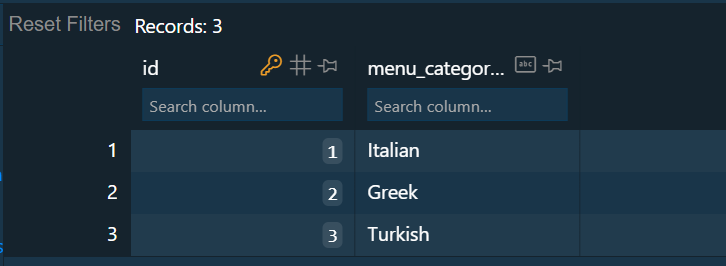
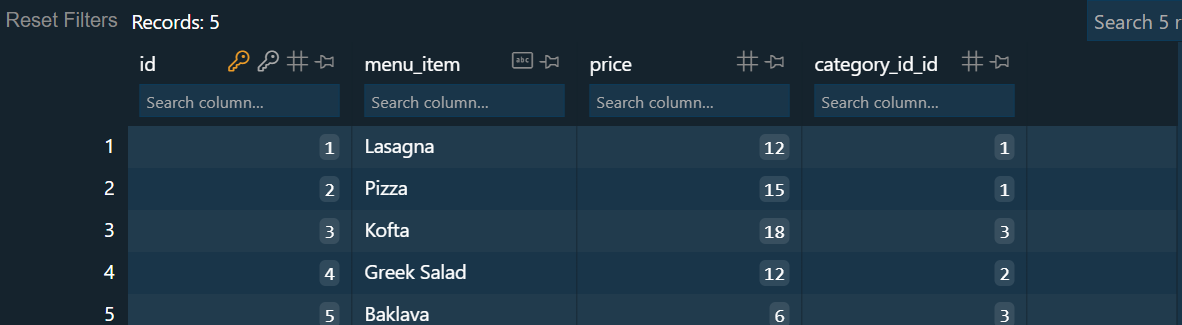

Now, visit `myapp_menu` and notice that there is a fourth field called `category_id_id`. This field has ID numbers that match the respective categories in the `myapp_menu` table. For example, `Greek salad` is listed as `id 2` and in the `myapp_menucategory`, the category name is `Greek`. The idea of the menu is referenced and corresponds with the ID listed in the menucategory.

We can rename `category_id_id` to `item_category_name` using attribute `db_column`

1. Open `models.py`(myapp) and add `db_column` in `ForeignKey()`
2. Run command `python manage.py makemigrations`
3. Run command `python manage.py migrate`

In [ ]:
# Step1- myapp/models.py:

from django.db import models

# Create your models here.
class MenuCategory(models.Model):
    menu_category_name=models.CharField(max_length=100)
    
class Menu(models.Model):
    menu_item=models.CharField(max_length=200)
    price=models.IntegerField(null=False)
    category_id=models.ForeignKey(MenuCategory, on_delete=models.PROTECT, default=None, db_column="item_category_name")
    
    # db_column="item_category_name" means that the myapp_menu now lists the item_category_name instead of category_id_id.
    # on_delete=models.PROTECT selected means No menu items will be removed with any category that is deleted in the category table.
    

**`on_delete=PROTECT`**

The `on_delete` parameter in a Django `ForeignKey` field defines what should happen when the referenced object (in your case, a `MenuCategory` object) is deleted. The `PROTECT` option means that Django will prevent deletion of the referenced object (`MenuCategory`) as long as there are still objects (Item instances in your case) that have a foreign key reference to it.

Here's a brief explanation of the on_delete options:

- `models.PROTECT`: Prevent deletion of the referenced object.
- `models.CASCADE`: Delete the referencing objects when the referenced object is deleted.
- `models.SET_NULL`: Set the foreign key to NULL when the referenced object is deleted. Requires the field to be nullable (null=True).
- `models.SET_DEFAULT`: Set the foreign key to its default value when the referenced object is deleted. Requires a default value to be defined.
- `models.SET()`: Set the foreign key to the value passed to SET() when the referenced object is deleted.
- `models.DO_NOTHING`: Do nothing when the referenced object is deleted. You are responsible for handling the situation manually (e.g., using database triggers).

In our case above, with `on_delete=models.PROTECT`, if you attempt to delete a MenuCategory object that is still referenced by one or more Item objects, Django will raise an exception and prevent the deletion.

<pre id='l20'></pre>
# Fixing migrations issues by deleting files

Let's we are experimenting with several models and have performed several migartions and we are not able to achieve what we want or let's we are getting error due to migrations or say we want to start models and migration stuff from scratch then we can that in following ways:

1. Open `migrations` folder which is inside `myapp` and delete all files except `__init__.py` file. Also, delete the `__pycache__` directory if it exists inside the migrations directory.
2. Delete your existing database file. This is typically a file named `db.sqlite3` in our project directory.

**Note:** Keep in mind that this process will delete all data in your database, so make sure to backup any important information before proceeding.

<pre id='l21'></pre>
# Get table data in django and render it on HTML page

1. We already have models in our `models.py`(myapp) and also model is registered in `admin.py`(myapp). So, we are going to use `Service` model for this task.
2. Open `urls.py`(myapp) and create an url for this
3. Open `views.py`(myapp) and create a corresponding view that map to url
4. Create a file "myserv.html inside `templates` folder.
5. Open `myserv.html`(templates) and add some html to render the table content

In [ ]:
# Step2- myapp/urls.py:

from django.urls import path
from . import views

urlpatterns = [
    path('myserv/', views.myServView, name="my-serv"),
]

In [ ]:
# Step3- myapp/views.py:

from django.shortcuts import render

# Create your views here.
from myapp.models import Service

def myServView(request):
    service_data=Service.objects.all()
    data={'servicedata':service_data}
    return render(request, "myserv.html", data)

In [ ]:
# Step5- templates/myserv.html:

{% extends "base.html" %}

{% block content %}
    <h1>MY Services</h1>
    
    <div>
        
        {% for service in servicedata %}

            <div>
                <h1>{{service.service_title}}</h1>
                <h4>{{service.service_icon}}</h4>
                <p>{{service.service_desc}}</p>
            </div>
            
        {% endfor %}
            
    </div>

    <br><br><br><br><br><br>
{% endblock  %}


<pre id='l22'></pre>
# Django `order_by`: Ascending, Descending, Limiting data

We will apply all these operation on our `Service` table. So, we apply we need apply these operation in `myServView()` of `views.py`(myapp)

In [ ]:
# myapp/views.py:

from django.shortcuts import render

# Create your views here.
from myapp.models import Service

def myServView(request):
    service_data=Service.objects.all().order_by('service_title') # ascending order
    data={'servicedata':service_data}
    return render(request, "myserv.html", data)

In [ ]:
# myapp/views.py:

from django.shortcuts import render

# Create your views here.
from myapp.models import Service

def myServView(request):
    service_data=Service.objects.all().order_by('-service_title') # descending order
    data={'servicedata':service_data}
    return render(request, "myserv.html", data)

In [ ]:
# myapp/views.py:

from django.shortcuts import render

# Create your views here.
from myapp.models import Service

def myServView(request):
    service_data=Service.objects.all().order_by('-service_title')[:2] # limiting (but does not support negative indexing)
    data={'servicedata':service_data}
    return render(request, "myserv.html", data)

<pre id='l23'></pre>
# Template filters

Suppose we wrote a description(for `service_desc`) and that description contain some html tags for highlight or bold or italic or any thing, then these tags is displayed as it is like a text i.e. all html tags are treated and rendered as normal text along with description content.

If we want that these html tags should be render as tags not as text then we need to use filter.

And for that we need to apply filter on that html file which are going to render or display those description. Here in our case we need to apply filter on our `myserv.html`(templates).

In [ ]:
# templates/myserv.html:

{% extends "base.html" %}

{% block content %}
    <h1>MY Services</h1>
    
    <div>
        
        {% for service in servicedata %}

            <div>
                <h1>{{service.service_title | safe | upper}}</h1> # applying multiple filters
                <h4>{{service.service_icon | lower }}</h4> # single filters
                <p>{{service.service_desc | safe }}</p> # safe filter will render tag as tag
            </div>
            
        {% endfor %}
            
    </div>

    <br><br><br><br><br><br>
{% endblock  %}


<pre id='l24'></pre>
# Model Form

If you want to use model and form together to save entries entered in a form inside a database, then Django provides a very efficient way to do that using ModelForm by providing a means to save received data as a response directly to the database.

Let's take an example: Say we want to create a reservation form for the little lemon restaurant. In the example, we first import the model we want to bind with your form. Then you add implementation details for it using a meta class. And finally, you create an instance of that form. 

Note, that instead of having separate classes for form and model, weu have just one that inherits the `ModelForm` and implements it. 

Since this is an implementation that involves sending form data back as a response, we also need to add some implementation details about the post method inside the view. Let's now examine how you can implement this. Previously, you learned that you can use the forms API to generate a static form using Django. 

1. Open `models.py`(myapp) and create model using following lines of code
2. Open `admin.py`(myapp) and register the model
3. Run command: `python manage.py makemigrations`
4. Run command:`python manage.py migrate`
5. Open `forms.py`(myapp) and create django form using `ModelForm`
6. Open `views.py`(myapp) and create a function using following lines of code
7. Open `urls.py`(myapp) and create an url that map to its corresponding view function
8. Create a file "modelform.html" inside `templates` folder
9. Open `modelform.html`(templates) and create html show form fields of django form

In [ ]:
# Step1- myapp/models.py:

from django.db import models

# Create your models here.

class Logger(models.Model): # for model form
    f_name=models.CharField(max_length=200)
    l_name=models.CharField(max_length=200)
    time_log=models.TimeField(help_text="enter exact time")

In [ ]:
# Step2- myapp/admin.py:

from django.contrib import admin

# Register your models here.

from .models import Logger

admin.site.register(Logger)

In [ ]:
# Step5- myapp/forms.py:

from django import forms
from .models import Logger

class LogForm(forms.ModelForm): # for modal form
    class Meta:
        model=Logger
        fields='__all__' # all fields of model 
        
        #fields=['f_name', 'time_log'] # we need only some fields

In [ ]:
# Step6- myapp/views.py:

from django.shortcuts import render

# Create your views here.
from myapp.forms import LogForm

def modelFormView(request):
    form=LogForm()
    if request.method=='POST':
        form=LogForm(request.POST) # update the form object with the contents of post inside the request object
        if form.is_valid():
            form.save()
    context={'form':form}
    return render(request, "modelform.html", context)

In [ ]:
# Step7- myapp/urls.py:

from django.urls import path
from . import views

urlpatterns = [
    path('modelform/', views.modelFormView, name="my-modelform"),
]

In [ ]:
# Step9- templates/modelform.html:

{% extends "base.html" %}

{% block content %}
    <h1>Model form</h1>
    
    <form action="" method="post">
        {% csrf_token %}

        {{ form.as_p }}
        <button type="submit">Submit</button>
    </form>

    <br><br><br><br><br><br>
{% endblock  %}


**Let's say we want few fileds from model in our form and also we want some additional fields in our form. Then we can do that in this way:**

In [1]:
# models.py:

from django.db import models

class Blog(models.Model):
    title = models.CharField(max_length=200)
    content = models.TextField()
    author = models.CharField(max_length=100)
    published_date = models.DateTimeField(auto_now_add=True)
    tags = models.CharField(max_length=200, blank=True)

    def __str__(self):
        return self.title

In [ ]:
# forms.py:

from django import forms
from .models import Blog

class BlogForm(forms.ModelForm):
    # Adding custom fields
    additional_info = forms.CharField(max_length=300, required=False, help_text="Add extra information if needed.")
    approval_status = forms.ChoiceField(choices=[('approved', 'Approved'), ('pending', 'Pending')], required=True)

    class Meta:
        model = Blog
        fields = ['title', 'content', 'author']  # Include only these fields from the model

In [ ]:
# views.py:

from django.shortcuts import render, redirect
from .forms import BlogForm

def create_blog_view(request):
    if request.method == 'POST':
        form = BlogForm(request.POST)

# When saving the form, you need to handle the custom fields separately since they are not part of the model.
        
        if form.is_valid():
            # Save the model fields
            blog_instance = form.save()

            # Access and process the custom fields
            additional_info = form.cleaned_data['additional_info']
            approval_status = form.cleaned_data['approval_status']

            # Do something with the additional data, such as logging or saving it elsewhere
            print(f"Additional Info: {additional_info}")
            print(f"Approval Status: {approval_status}")

            return redirect('blog-list')
    else:
        form = BlogForm()

    return render(request, 'create_blog.html', {'form': form})


In [ ]:
# create_blog.html

<!DOCTYPE html>
<html>
<head>
    <title>Create Blog</title>
</head>
<body>
    <h1>Create Blog</h1>
    <form method="post">
        {% csrf_token %}
        {{ form.as_p }}
        <button type="submit">Submit</button>
    </form>
</body>
</html>


<pre id='l25'></pre>
# Saving HTML form data to database

What we want to achieve here is when user click on submit button then all entries are saved in database

1. Create a file "htmlform.html" inside `templates` folder
2. Open `htmlform.html`(templates) and create input field for name, mobile, email, website and message and a submit button
3. Open `models.py`(myapp) and create model having fields same as form field
4. Open `admin.py`(myapp) and register the model we have just created
5. Run command: `python manage.py makemigrations`
6. Run command: `python manage.py migrate`
7. Open `views.py`(myapp) and create a view function using following lines of code
8. Open `urls.py`(myapp) and create an url that map to its corresponding view

In [ ]:
# Step2- templates/htmlform.html:

{% extends "base.html" %}

{% block content %}
    <h1>HTML form</h1>
    
    <form action="" method="post">
        {% csrf_token %}

        <div>
            <label for="id_name">Name:</label>
            <input id="id_name" maxlength="255" name="name" type="text" />
        </div>
        <div>
            <label for="id_email">Email:</label>
            <input id="id_email" maxlength="255" name="email" type="text" />
        </div>
        <div>
            <label for="id_mobile">Mobile</label>
            <input id="id_mobile" maxlength="255" name="mobile" type="text" />
        </div>
        <div>
            <label for="id_website">Website:</label>
            <input id="id_website" maxlength="255" name="website" type="text" />
        </div>
        <div>
            <label for="id_message">Message:</label>
            <textarea cols="40" id="id_message" name="message" rows="10">
            </textarea>
        </div>

        <button type="submit">Submit</button>
    </form>

    <br><br><br><br><br><br>
{% endblock  %}


In [ ]:
# Step3- myapp/models.py:

from django.db import models

# Create your models here.

class Enquiry(models.Model): # saving from html form
    name=models.CharField(max_length=50)
    email=models.EmailField(max_length=50)
    mobile=models.CharField(max_length=10)
    website=models.CharField(max_length=70)
    message=models.TextField()

In [ ]:
# Step4- myapp/admin.py:

from django.contrib import admin

# Register your models here.

from .models import Enquiry

admin.site.register(Enquiry)

In [ ]:
# Step7- myapp/views.py:

from django.shortcuts import render

# Create your views here.
from myapp.models import Enquiry

def htmlformView(request):
    if request.method=='POST':
        name=request.POST.get('name')
        email=request.POST.get('email')
        mobile=request.POST.get('mobile')
        website=request.POST.get('website')
        message=request.POST.get('message')
        enquiry=Enquiry(name=name, email=email, mobile=mobile, website=website, message=message)
        enquiry.save()
    
    return render(request, "htmlform.html")

In [ ]:
# Step8- myapp/urls.py:

from django.urls import path
from . import views

urlpatterns = [
    path('htmlform/', views.htmlformView, name="my-htmlform"),
]

<pre id='l26'></pre>
# Fetching all data from database and display it

Above we saved the all all form entries in our database. Now what i want when after submitting the form we will go on an url(using `action` attribute in form) and show all entries of database (In real life we don't such kind of thing i.e. show all data entries of database to user. We only show thier data which we will do in next topic) from same view function i.e. `htmlformView()`(**We can perform this task from new view function as well**). We are only doing to understand how to get all data from database and use it for specific purpose.

1. Keep `models.py`(myapp) and `admin.py`(myapp) as it is(as in`Saving HTML form data to database`) without making any changes.
2. Open `views.py`(myapp) and update the code of `htmlformView()` using following lines of code
3. Open `urls.py`(myapp) and create url that will hit after submit and also make sure to it map to `htmlformView()`because we want to perform this task from same view function.(We can perform this task from new view function as well)
4. Open `htmlform.html`(templates) and add `action` attribute by providing url that we have created above
5. Create a file "data.html" inside `templates` folder
6. Open `data.html`(templates) and write following lines of code to display data

In [ ]:
# Step2- myapp/views.py:

def htmlformView(request):
    
    if request.method=='POST':
        name=request.POST.get('name')
        email=request.POST.get('email')
        mobile=request.POST.get('mobile')
        website=request.POST.get('website')
        message=request.POST.get('message')
        enquiry=Enquiry(name=name, email=email, mobile=mobile, website=website, message=message)
        enquiry.save()
        
        all_entries=Enquiry.objects.all() # fetch all records from database
        return render(request, "data.html", {'entries':all_entries}) # rendered after submit
    
    return render(request, "htmlform.html") # it will be render before submit

In [ ]:
#Step3- myapp/urls.py:

from django.urls import path
from . import views

urlpatterns = [
    path('htmlform/', views.htmlformView, name="my-htmlform"),
    path('htmlformdata/', views.htmlformView, name="my-htmldata"), 
    # this url will hit after submit to show data from model from same view function
]

In [ ]:
# Step4- templates/htmlform.html:

{% extends "base.html" %}

{% block content %}
    <h1>HTML form</h1>
    
    <form action="{% url 'my-htmldata' %}" method="post"> # adding action attribute
        {% csrf_token %}

        <div>
            <label for="id_name">Name:</label>
            <input id="id_name" maxlength="255" name="name" type="text" />
        </div>
        <div>
            <label for="id_email">Email:</label>
            <input id="id_email" maxlength="255" name="email" type="text" />
        </div>
        <div>
            <label for="id_mobile">Mobile</label>
            <input id="id_mobile" maxlength="255" name="mobile" type="text" />
        </div>
        <div>
            <label for="id_website">Website:</label>
            <input id="id_website" maxlength="255" name="website" type="text" />
        </div>
        <div>
            <label for="id_message">Message:</label>
            <textarea cols="40" id="id_message" name="message" rows="10">
            </textarea>
        </div>

        <button type="submit">Submit</button>
    </form>

    <br><br><br><br><br><br>
{% endblock  %}


In [ ]:
# Step6- templates/data.html:

{% extends "base.html" %}

{% block content %}
    <h1>Your data is submitted successfully</h1>
    
    {% if entries %}
        <ul>
            {% for entry in entries %}
                <li>Name: {{ entry.name }}, Email: {{ entry.email }}, Mobile: {{ entry.mobile }}, Website: {{ entry.website }}, Message: {{ entry.message }}</li>
            {% endfor %}
        </ul>
    {% else %}
        <p>No entries yet.</p>
    {% endif %}

    <br><br><br><br><br><br>
{% endblock  %}


<pre id='l27'></pre>
# Displaying form data entries after user submit HTML form

What i want to achieve here is when user submit the form then we want to display the data that user have just entered in form.

1. Keep `models.py`(myapp), `admin.py`(myapp), `urls.py`(myapp), and `htmlform.html`(templates) as it is(as in`Fetching all data from database and display it`) without making any changes.
2. Open `views.py`(myapp) and update the code of `htmlformView()` using following lines of code
3. Open `data.html`(myapp) and update code as per our requirement using following lines of code

In [ ]:
# Step2- myapp/views.py:

from django.shortcuts import render

# Create your views here.
from myapp.models import Enquiry

def htmlformView(request):
    
    if request.method=='POST':
        name=request.POST.get('name')
        email=request.POST.get('email')
        mobile=request.POST.get('mobile')
        website=request.POST.get('website')
        message=request.POST.get('message')
        enquiry=Enquiry(name=name, email=email, mobile=mobile, website=website, message=message)
        enquiry.save()
        
        # Fetch the recently added entry
        recent_entry = Enquiry.objects.latest('id')
        return render(request, "data.html", {'recent_entry': recent_entry}) # rendered after submit
    
    return render(request, "htmlform.html") # it will be render before submit

In [ ]:
# Step3- templates/data.html

{% extends "base.html" %}

{% block content %}
    <h1>Your data is submitted successfully</h1>
    
    {% if recent_entry %}
        <p>Name: {{ recent_entry.name }}</p>
        <p>Email: {{ recent_entry.email }}</p>
        <p>Mobile: {{ recent_entry.mobile }}</p>
        <p>Website: {{ recent_entry.website }}</p>
        <p>Message: {{ recent_entry.message }}</p>
    {% else %}
        <p>No recent entries.</p>
    {% endif %}

    <br><br><br><br><br><br>
{% endblock  %}


<pre id='l28'></pre>
# Django Admin 

- When we develop a web application, much of the content is stored somewhere like in a database. As a result, a common task is to provide an administration or admin site as part of the application. 

- The purpose of this admin side is to allow certain users to administer and manage the data of the application. 

- Suppose the owners of Little Lemon have asked to store all of the website content in a database so it can be updated by the restaurant staff. For example, managers can use the admin site to add or edit content. That content is displayed on the public site. 

- Django solves the problem by automatically creating a unified admin interface for site administrators to add, edit and delete content, such as users, permissions and database entries. 

- This process is automated as the admin interface directly links to the models in the project once registered. The admin interface is usually a part of a large web application to help the administrator perform certain administrative tasks. The tasks such as creating and managing users, controlling access permission, and forming user groups. 

- Django reads the models declared in the project and from the metadata of models declared in a project, it quickly builds an easy-to-use interface. 

- It's important to remember that the admin site isn't intended to be used by site visitors. It's for site managers. 

- The Django admin utility is executed from inside the terminal. It is enabled and assigned to a project by default when you run a command such as start project inside Django. 

- As the admin interface depends on django.com.admin app, we'll find it in the installed app section of the `settings.py` file, along with certain other apps. 

- Using Django and Django admin provides a convenient means of accessing and modifying these databases from a friendly user interface. 

- Before we access this interface, we first need to create an admin user that provides us with the necessary credentials. 

Let's explore how to do that: 

1. Create user using command: `python manage.py createsuperuser` and enter the details: `username`, `email` and `password`.
2. Run the server and add suffix `/admin/` in url i.e. `http://127.0.0.1:8000/admin/`
3. Enter the login credentials that we have used during creating superuser

After login we will be able to see `Groups`, `users`, and `myapp`(installed app) and its models. We can see enteries of model. We can also add, modify and delete entries of model from here as well.

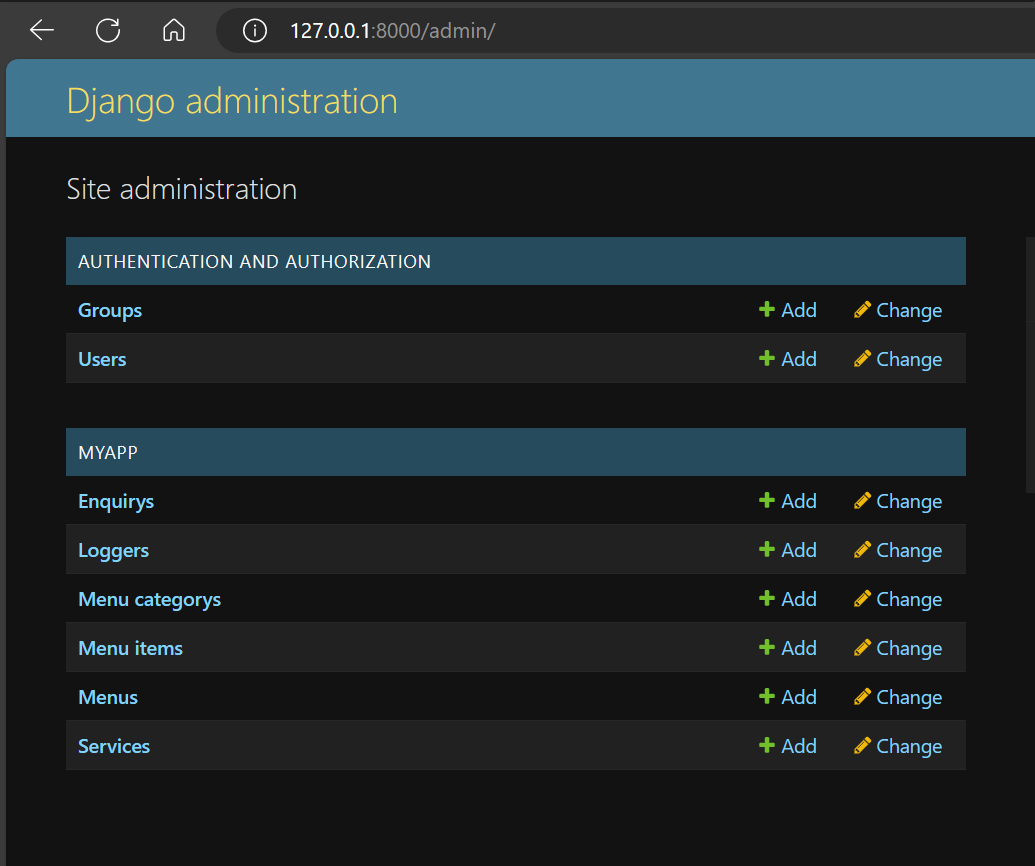

Let's open `Enquiry` then we will find that its data displayed is not meaningful to us. But we can make it display as per our requirement. We can do this in many different ways:

**First method:**(we are performing here for `Enquiry` but same can be used for others as well)
1. Open `models.py`(myapp) and go to `Enquiry` model class and override the dunder method `__str__()` using following lines of code.

In [ ]:
# Step1- myapp/models.py:

from django.db import models

# Create your models here.
    
class Enquiry(models.Model): # saving from html form
    name=models.CharField(max_length=50)
    email=models.EmailField(max_length=50)
    mobile=models.CharField(max_length=10)
    website=models.CharField(max_length=70)
    message=models.TextField()
    
    def __str__(self):
        return self.name # we want to see records in admin by name
        # we can include other more fields also but it should return string

**Second method:**(we are performing here for `Menu` but same can be used for others as well)
1. Open `admin.py`(myapp) and add the following lines of code to display data in specific and meaningful way and also update the `register` function parameters

In [ ]:
# Step1- myapp/admin.py:

from django.contrib import admin

# Register your models here. 

from .models import Menu
    
class MenuAdmin(admin.ModelAdmin):
    list_display=('menu_item',) # we can add multiple fileds (for single filed add comma at end)
    # this should be only 'list_display', no other name
    
    # other examples:
#     search_fields=['name', 'location', 'type']
#     list_filter=['type', 'added_date', 'active']
#     list_editable=['name', 'location', 'type', 'active']
#     list_per_page=10

admin.site.register(Menu, MenuAdmin) # update parameters

**NOTE:** variable name should be strictly same as above as these variables as defined inside `admin.ModelAdmin`

**Third method:**(we are performing here for `Menu` but same can be used for others as well)
1. Open `admin.py`(myapp) and add decorator `@admin.register` to register the model so that we don't have write extra line of code to register the model in admin panel.

In [ ]:
# Step1- myapp/admin.py:

from django.contrib import admin

# Register your models here. 

from .models import Menu
    
@admin.register(Menu)
class MenuAdmin(admin.ModelAdmin):
    list_display=('menu_item',) # we can add multiple fileds (for single filed add comma at end)

There are four types of values that can be used in `list_display`:

1. The name of a model field.
2. A callable that accepts one argument, the model instance.
3. A string representing a `ModelAdmin` method that accepts one argument, the model instance.
4. A string representing a model attribute or method(without any required arguments).

<pre id='l29'></pre>
# TinyMCE editor in Django admin

Let's apply this on `Service` model where we have field called `service_desc` which store some texts or paragraphs where we may need editor for formatting text like `bold`, `italic`, `underline` and so on. We will able to apply all these formatting on text from Django admin panel. 

1. First install package using command: `pip install django-tinymce`
2. Open `settings.py`(myproject) and update the `INSTALLED_APPS` by adding text `tinymce` inside it.
3. Open `models.py`(myapp) and update `Service` model by adding following lines of code

In [ ]:
# Step3- myproject/settings.py:

INSTALLED_APPS = [
    'django.contrib.admin',
    'django.contrib.auth',
    'django.contrib.contenttypes',
    'django.contrib.sessions',
    'django.contrib.messages',
    'django.contrib.staticfiles',
    'myapp', # OR 'myapp.apps.MyappConfig'
    'tinymce',
]

In [ ]:
# Step3- myapp/models.py:

from django.db import models

# Create your models here.
from tinymce.models import HTMLField


class Service(models.Model):
    service_icon=models.CharField(max_length=50)
    service_title=models.CharField(max_length=50)
    service_desc=HTMLField() # tinymce editor for this fied
    
    def __str__(self):
        return self.service_title

<pre id='l30'></pre>
# How to reset Django admin password

- To change the password of Djnago admin user run command: `python manage.py chnagepassword demouser` (here demouser is username).
- If we forget our username then open `db.sqlite3`(myproject) and inside `auth_user` table we can find username. 

<pre id='l31'></pre>
# User and Permission

- In most apps, users are allocated different roles that allow them to perform certain actions. To enable these actions, they need to have the relevant permission granted to them. 

- Think about the following scenario: When we visit a restaurant, we're not allowed to go into the kitchen. However, if we are a member of staff, we are allowed to go into the kitchen. Web applications have a similar concept for controlling which users are allowed to do which action. This is called permissions.

- The Django framework has an in-built system for handling permissions. This authentication system has features for both authentication and authorization, coupled for ease of use. For a user to perform a certain action, they need to have the relevant permission granted to them. 

- It is important to note that a user in Django can be one of three classifications namely: a `superuser`, a `staff user`, or a `user`. 

Much like other components of Django, users in Django are Python objects. The specific type of user is characterized by special attributes that are set inside the user object. 

1. `Super user`: A super user is a top level user or administrator of the system. This type of user possesses permission to add, change, or delete other users, as well as perform operations on all the data in the project. 

2. `Staff user`: A staff type user is allowed to access Django admin interface. However, a staff user doesn't automatically get the permission to `create`, `read`, `update`, and `delete` data in the Django admin, it must be given explicitly.

**Note:** A super user is a staff user by default. Everyone else is irregular user by default.

3. `User`: A user is not authorized to use the admin site. Users are marked as active by default. A user may be marked as inactive if it's authentication fails or has been banned for some reason. 

While we can create the user through the admin interface, it can also be done through the Django shell:
<code>
    >>> from django.contrib.auth.models import User
    >>> usr=User.objects.create_user('testuser', 'abc@xyz.com', 'pass123') 
</code>

Once the user is created, we can grant a certain status to a user to become a staff member:
<code>
    >>> usr.is_staff=True
    >>> usr.save()
</code>

**How do you create a superuser?** Use a command `python manage.py createsuperuser --username=john --email=john@meta.com`.

- Remember that the superuser has every permission in the system, whether it is custom permissions or Django created permissions. 

- There are several places where specific permission settings can be enabled, for example, to a specific model or object. How do you set permissions in a model? 

As we create models in our Django application, Django automatically creates `add`, `change`, and `delete` and `view` permissions. 

Permissions are named using the app action model pattern: `<app>.<action_model>`; app is the name of the Django app, action is `add`, `change`, `delete` or `view` and model is the name of the model in lowercase. 

Assume that a Django app called `myapp` is created in the current project, and it has a model with the name `mymodel` declared in it. The permissions on this model will be as follows: `myapp.add_mymodel`, `myapp.change_mymodel`, `myapp.delete_mymodel` and `myapp.view_ mymodel`.

In Python code, it is possible to check if a user has a certain type or permission enabled on it. To do this, we can use the `has_perm()` function, which returns true or false. 

For example, if the requesting user doesn't have the appropriate permissions, you can raise a permission denied error instead of returning the normal HTTP response:
<code>
    def myview(request):
        if not request.user.has_perm('myapp.view_mymode'):
            raise PermissionDenied()
        return HttpResponse()
</code>


Assigning permissions to each user individually is a tedious task, especially if we have large numbers of users. Fortunately, Django has a solution. We can manage permissions to sets of users in Django `groups`. 

**What is a `group`?** In Django, a `group` is a list of permissions that can be assigned to one or more users. A user can belong to any number of groups. 

To go back to the restaurant example, we might have a group for kitchen staff and another group for waiters. When we create or modify a user, simply choose the desired group. All the permissions listed in the group will be automatically assigned to the user. 

- It is important to note that we can still manually add permissions to users, even if they belong to a group.

- We can give permissions to a user while creating it in the admin panel or from the shell interface. Using groups is a convenient way of enabling similar sets of permissions to multiple users. 

- To enforce a permission while executing a view function, we can use the app `@permission_required` decorator.


<pre id='l32'></pre>
# How to add and remove permissions from users

- The Django framework has a built in mechanism that manages permissions quite efficiently. 
- The Django admin web interface makes it easier for us to create and modify users or user groups.

- While Django admin has a user friendly interface which makes handling permissions quite easy. It is also possible to handle permissions through the Django shell. 

To demonstrate this,  first open the interactive Django shell:
<code>
    >>> from django.contrib.auth.models import User
    >>> user=User.objects.create_user('mario', 'mario@littlelemon.com', 'pass123') 
    >>> user_name=User.objects.get(username="mario")
</code>

- Django comes with a built-in permission system. It provides a way to assign permissions to specific users and groups of users. 

When `django.contrib.auth` is listed in our `INSTALLED_APPS`(settings.py), it will ensure that four default permissions are available. This functionality allows you to `add`, `change`, `delete`, and `view` permissions and are created for each Django model defined in one of your installed applications. 

- Permissions can be set not only per type of object, but also per specific object instance. 

- By using the methods provided by the `ModelAdmin` class, it is possible to customize permissions for different object instances of the same type. 

- Similar to the admin permissions, permission specific to models can also be managed using the `ModelAdmin` class. 

- The `ModelAdmin` class methods include `view()`, `add()`, `change()`, and `delete()` and are used to customize the permissions.

Let's explore user objects. User objects have two main fields known as `groups` and `user permissions`. 

- User permissions store and reference a single or multiple permission objects. Permissions can be granted or removed by calling the methods `set()`, `add()`, `remove()`, and `clear()` on the user object. 

Let's explore an example using the `add()` method to grant permissions to the user `Mario`. In this scenario, let's provide one or more permission objects. We use the `add()` method to add a permission to change the `Menu` model inside the app `myapp`: `user_name.user_permissions.add('myapp.change_menu')`

It's important to know that once you add `django.contrib.auth` to the `INSTALLED_APPS`(settings.py) list, we must run the migrate command to implement the change. Note that when you run `python manage.py migrate` each Django model is assigned the default permissions. 

For example, suppose you have a Django app called `myapp` in which there is a model named `mymodel`. If you run boolean expression to verify the permissions to `add`, `change`, `delete`, and `view`, they will return true:
<code>
    user_name.has_perm('myapp.add_mymodel')
    user_name.has_perm('myapp.change_mymodel')
    user_name.has_perm('myapp.delete_mymodel')
    user_name.has_perm('myapp.view_mymodel')
</code>

- In addition to the default permissions, custom permissions can be declared in the models Meta class, which can be declared inside the model. 

- In practice it is much easier to deal with them(modifying permissions) using the Django admin interface in the browser.


<pre id='l33a'></pre>
# Display news headlines in marquee HTML tag

1. Open `models.py`(myapp) and create model that have filed like `headline` and `details` using following lines
2. Open `admin.py`(myapp0 and register model using following lines of code
3. Run command: `python manage.py makemigrations`
4. Run command: `python manage.py migrate`
5. Create a file "marquee.html" inside `templates` folder
6. Open `views.py`(myapp) and create fiew to render `marquee.html`(templates) to show news headlines
7. Open `urls.py`(myapp) and create url that map its corresponding views
8. Open `marquee.html`(templates) and html to display headlines as link
9. Open `styles.css`(static/CSS) and css to style the headline

In [ ]:
# Step1- myapp.models.py:

from django.db import models

# Create your models here.
from tinymce.models import HTMLField
    
class News(models.Model):
    headline=models.CharField(max_length=200)
    details=HTMLField()
    
    def __str__(self):
        return self.headline

In [ ]:
# Step2- myapp/admin.py:

from django.contrib import admin

# Register your models here.
from.models import News

admin.site.register(News)

In [ ]:
# Step6- myapp/views.py:

from django.shortcuts import render

# Create your views here.
from myapp.models import News

def marqueeView(request):
    data=News.objects.all()
    return render(request, "marquee.html", {'data':data})

In [ ]:
# Step7- myapp/urls.py:

from django.urls import path
from . import views

urlpatterns = [
    path('marquee/', views.marqueeView, name="my-marquee"),
]

In [ ]:
# Step8- templates/marquee.html:

{% extends "base.html" %}

{% block content %}
    <h1>Marquee </h1>

    <div class="marquee-container">
        <marquee class="marquee-content" behavior="scroll" direction="left" onmouseover="this.stop();" onmouseout="this.start();">
            
            {% for news in data %}

                <a href="">{{news.headline}}</a> # href means on which url you want to go
                &nbsp;&nbsp;&nbsp;
        
            {% endfor %}
            
        </marquee>
    </div>
    
    <br><br><br><br><br><br>
{% endblock  %}


In [ ]:
# Step9- static/CSS/styles.css:

/* CSS for marquee: */

.marquee-container {
    overflow: hidden;
    white-space: nowrap;
    margin: 0 auto;
}

.marquee-content {
    display: inline-block;
}

<pre id='l33b'></pre>
# Displaying news details on another page

In `Display news headlines in marquee HTML tag` we added news headline on webpage that keep moving on page from left to right. Now what I want is when user click on news headline then a new page open showing details of news along with its headline.

1. Open `views.py`(myapp) and create function that fetch specific news detilas from database using following lines of code
2. Open `urls.py`(myapp) and create a dynamic url that display news details as per request
3. Open `marquee.html`(templates) and update `href` atrribute of `<a>` tag
4. Create a file "newsdetails.html" inside `templates` folder
5. Open `newsdetails.html`(templates) and add following lines of code to show details

In [ ]:
# Step1- myapp/views.py:

from django.shortcuts import render

# Create your views here.
from myapp.models import News

def marqueeView(request): # fetch all records from database
    data=News.objects.all()
    return render(request, "marquee.html", {'data':data})

def newsdetailsView(request, newsid): # fetch only specific record from database
    news_data=News.objects.get(id=newsid)
    return render(request, "newsdetails.html", {'news_data':news_data})

In [ ]:
# Step2- myapp/urls.py:

from django.urls import path
from . import views

urlpatterns = [
    path('marquee/', views.marqueeView, name="my-marquee"), # for headline
    path('newsdetails/<newsid>', views.newsdetailsView, name="my-newsdetails"), # for headline details
]


In [ ]:
# Step3- templates/marquee.html:

{% extends "base.html" %}

{% block content %}
    <h1>Marquee </h1>

    <div class="marquee-container">
        <marquee class="marquee-content" behavior="scroll" direction="left" onmouseover="this.stop();" onmouseout="this.start();">
            
            {% for news in data %}

                <a href="/myapp/newsdetails/{{news.id}}">{{news.id}}. {{news.headline}}</a>     
                &nbsp;&nbsp;&nbsp;
                
                <a href="{% url 'my-newsdetails' news.id %}">{{news.id}}. {{news.headline}}</a> # using url tag
                &nbsp;&nbsp;&nbsp;
        
            {% endfor %}
            
        </marquee>
    </div>
    
    <br><br><br><br><br><br>
{% endblock  %}


In [ ]:
# Step5- templates/newsdetails.html:

{% extends "base.html" %}

{% block content %}
    <h1>News Description</h1>

    <div>
        <h3>{{ news_data.headline }}</h3> # headline
    </div>
    <div>
        <p>{{ news_data.details | safe }}</p> # details
    </div>
    
    <br><br><br><br><br><br>
{% endblock  %}


<pre id='l34'></pre>
# Displaying news details on same page

In `Displaying news details on another page` we were displaying news details on another page. Now what I want is we want to display image on same page such that news headline keep moving page and when user click on a particular headline then that headlines details are displayed below along headline. In short what i want is page should have headlines moving above and news detials are shown below whenever user click on headline.

1. Keep `urls.py`(myapp) as it is
2. Open `views.py`(myapp) and write the following code to display headline and details
3. Create a file "marqueenewsdetails.html" inside `templates` folder
4. Open `marqueenewsdetails.html`(templates) and code to display headline in `<marquee>` and also display the headline details in same page.

In [ ]:
# Step1- myapp/urls.py:

from django.urls import path
from . import views

urlpatterns = [
    path('marqueenewsdetails/', views.marqueenewsdetailsView, name="my-marqueenewsdetails"), 
    # headline and details on same page
]

In [ ]:
# Step2- myapp/views.py:

from django.shortcuts import render, get_object_or_404

# Create your views here.
from myapp.models import News

def marqueenewsdetailsView(request): # headline and details on same page
    data = News.objects.all()
    selected_news = None
    if 'news_id' in request.GET:
        newsid = request.GET['news_id']
        selected_news = get_object_or_404(News, id=newsid)
        # get_object_or_404() is a shortcut function to get an object from the database or 
        # raise a 404 error if it doesn't exist.

    return render(request, "marqueenewsdetails.html", {'data': data, 'selected_news': selected_news})

In [ ]:
# Step4- templates/marqueenewsdetails.html:

{% extends "base.html" %}

{% block content %}
    <h1>Marquee </h1>

    <div class="marquee-container">
        <marquee class="marquee-content" behavior="scroll" direction="left" onmouseover="this.stop();" onmouseout="this.start();">
            {% for news in data %}
                <a href="?news_id={{ news.id }}">{{news.id}}. {{news.headline}}</a>
                &nbsp;&nbsp;&nbsp;
            {% endfor %}
        </marquee>
    </div>

    <div class="news-details-container">
        {% if selected_news %}
            <h2>{{ selected_news.headline }}</h2>
            <p>{{ selected_news.details | safe }}</p>
        {% endif %}
    </div>

    
    <br><br><br><br><br><br>
{% endblock  %}

<pre id='l35'></pre>
# Django autoslug

What we were doing above is when we have display a headline line details then we pass news id to url to get that details of headline. Passing news is to urls is not good practice. 

So, what autoslug does is it basically pass slug of headline to url and these slug is generated automatically, we don't write slug manually.


### Applying it on `Displaying news details on another page`

1. Open `models.py`(myapp) and update the code using following lines of code
2. Run command: `python manage.py makemigrations`
3. Run command: `python manage.py migrate`
4. Open `views.py`(myapp) and update the code
5. open `urls.py`(myapp) and update the code
6. Open `marquee.html`(templates) and update the code
7. Keep `newdetails.html`(templates) as it is, no changes required here

In [ ]:
# Step1- myapp/models:

from django.db import models

# Create your models here.
from tinymce.models import HTMLField
from autoslug import AutoSlugField

class News(models.Model):
    headline=models.CharField(max_length=200)
    details=HTMLField()
    headline_slug = AutoSlugField(populate_from='headline', unique=True, null=True, default=None) # autoslug
    
    def __str__(self):
        return self.headline

In [ ]:
# Step4- myapp/views.py:

from django.shortcuts import render

# Create your views here.
from myapp.models import News


def marqueeView(request): # fetch all record from database
    data=News.objects.all()
    return render(request, "marquee.html", {'data':data})

def newsdetailsView(request, news_slug): # fetch only specific record from database
    news_data=News.objects.get(headline_slug=news_slug)
    return render(request, "newsdetails.html", {'news_data':news_data})

In [ ]:
# Step5- myapp/urls.py:

from django.urls import path
from . import views

urlpatterns = [
    path('marquee/', views.marqueeView, name="my-marquee"), # for headline
    path('newsdetails/<news_slug>', views.newsdetailsView, name="my-newsdetails"), # for headline details
]


In [2]:
# Step6- templates/marquee.html:

{% extends "base.html" %}

{% block content %}
    <h1>Marquee </h1>

    <div class="marquee-container">
        <marquee class="marquee-content" behavior="scroll" direction="left" onmouseover="this.stop();" onmouseout="this.start();">
            
            {% for news in data %}

                <a href="/myapp/newsdetails/{{news.headline_slug}}">{{news.id}}. {{news.headline}}</a>     
                &nbsp;&nbsp;&nbsp;
                
                <a href="{% url 'my-newsdetails' news.headline_slug %}">{{news.id}}. {{news.headline}}</a> # using url tag
                &nbsp;&nbsp;&nbsp;
        
            {% endfor %}
            
        </marquee>
    </div>
    
    <br><br><br><br><br><br>
{% endblock  %}


<pre id='l36'></pre>
# Searching in Django

What I want here is we have service page(`myserv.html`) where thousands of services are there and we want to search specific service among thousands of services. Let's say we want to search by service `title` name: 

1. Open `myserv.html`(templates) and add html code to take input for searching using following lines of code
2. Open `views.py`(myapp) and update the code to implement searching functionality without disturbing the current existing functionality of code.

In [ ]:
# Step1- templates/myserv.html:

{% extends "base.html" %}

{% block content %}
    <h1>MY Services</h1>

    <div>
        <form action="" method="get"> # Search form
            <input type="text" name="search_service" placeholder="Search Service">
            <input type="submit" value="Search">
        </form>
    </div>
    <br><br><br>
    <div>
        
        {% for service in servicedata %}

            <div>
                <h1>{{service.service_title | safe | upper}}</h1>
                <h4>{{service.service_icon}}</h4>
                <p>{{service.service_desc | safe }}</p>
            </div>
            
            {% empty %} # if no record found
                <h6>No record Found</h6>
            

        {% endfor %}
            
    </div>

    <br><br><br><br><br><br>
{% endblock  %}


In [ ]:
# Step2- myapp/views.py:

def myServView(request):
    service_data=Service.objects.all().order_by('service_title')[:] # for descending: order_by('-service_title')  
    if request.method=='GET':
        search_data=request.GET.get('search_service')
        if search_data!=None:
            service_data=Service.objects.filter(service_title=search_data) # search exact title
            service_data=Service.objects.filter(service_title__icontains=search_data) # search irrespctive of case, exact word
    data={'servicedata':service_data}
    return render(request, "myserv.html", data)

<pre id='l37'></pre>
# File upload in Django admin panel

1. Create a folder "media" inside project(package) folder to store uploaded file
2. Open `settings.py`(myproject) and add following lines of code to include `media` folder in our project for storing files that uploaded from admin panel.
3. Open `urls.py`(myproject) and add following lines of code
4. Open `models.py`(myapp) and add following lines of code to create field `title`, `file` and `description`
5. Open `admin.py`(myapp) and register model using following lines of code
6. Run command: `python manage.py makemigrations`
7. Run command: `python manage.py migrate`

In [ ]:
# Step2- myproject/settings.py:

import os

# make sure to import os before adding these line:

MEDIA_ROOT=os.path.join(BASE_DIR, "media")
MEDIA_URL="/media/"

# we can add these lines of code anywhere in file

In [ ]:
# Step3- myproject/urls.py:

from django.contrib import admin
from django.urls import path, include

from django.conf import settings
from django.conf.urls.static import static

urlpatterns = [
    path('admin/', admin.site.urls),
    path('myapp/', include("myapp.urls")),  
]
if settings.DEBUG:
    urlpatterns += static(settings.MEDIA_URL, document_root=settings.MEDIA_ROOT)

In [ ]:
# Step4- myapp/models.py:

from django.db import models

# Create your models here.
from tinymce.models import HTMLField

class FileUpload(models.Model): # upload file from admin
    title=models.CharField(max_length=200)
    file=models.FileField(upload_to="uploads")
    description=HTMLField()

In [ ]:
# Step5- myapp/admin.py:

from django.contrib import admin

# Register your models here.
from .models import FileUpload
    
class FileUploadAdmin(admin.ModelAdmin):
    list_display=('title','file',)

admin.site.register(FileUpload, FileUploadAdmin)

**Remark:** Always include following lines of code in `urls.py`(myproject) only, if you are using `urls.py` at both project level and app level.
<code>
    from django.conf import settings
    from django.conf.urls.static import static
    
    if settings.DEBUG:
        urlpatterns += static(settings.MEDIA_URL, document_root=settings.MEDIA_ROOT)
</code>

<pre id='l38'></pre>
# Displaying uploaded image on webpage

Above(`File upload in Django admin panel`) we have uploaded images in database table from admin panel. Now what I want is display all details of first entry of table(`title`, `file` and `description`).

1. Create a file "imageupload.html" inside `templates` folder
2. Open `views.py`(myapp) and write following lines of code to fetch data from database
3. Open `urls.py`(myapp) and create an url and map to its corresponding views
4. Open `uploadimage.html`(templates) and add following lines of code to render data from database

In [ ]:
# Step2- myapp/views.py:

from django.shortcuts import render, redirect

# Create your views here.
from myapp.models import FileUpload

def uploadimageView(request):
    data=FileUpload.objects.get(pk=1) # want to display first record only
    return render(request, "imgupload.html", {'data':data})

In [1]:
# Step3- myapp/urls.py:

from django.urls import path
from . import views

urlpatterns = [
    path('uploadimage/', views.uploadimageView, name="my-uploadimage"),
]

In [ ]:
# Step4- templates/imageuplod.html:

{% extends "base.html" %}

{% block content %}

<div>
    <h1>{{ data.title }}</h1> # title
</div>

<img src="{{data.file.url}}" alt="profile-image"> # image

# we can render image this way also:
<img src="/media/{{data.file}}" alt="profile-image">

<div>
    <p>{{data.description | safe }}</p> # description
</div>

<br><br><br><br><br>
{% endblock %}


<pre id='l39'></pre>
# Sending email: message, message with HTML, attachment

1. Open `settings.py`(myproject) and add following email settings in this file and save it.
2. Open `views.py`(myapp) and create view function to send email of different types of content
3. Open `urls.py`(myapp) and create url and map its view
4. Create a file "email.html" inside `templates` folder
5. Open `email.html`(templates) and add following lines of code to create a button to send email

In [ ]:
# Step1- myproject/settings.py:

# Email settings
EMAIL_BACKEND = 'django.core.mail.backends.smtp.EmailBackend'
EMAIL_HOST = 'smtp.gmail.com'
EMAIL_PORT = 587
EMAIL_HOST_USER = 'sender@gmail.com' # sender
EMAIL_HOST_PASSWORD = 'password' # app password
EMAIL_USE_TLS = True
EMAIL_USE_SSL = False

In [ ]:
# Step2- myapp/views.py:

from django.shortcuts import render

# Create your views here.
from django.http import HttpResponse
from django.core.mail import send_mail, EmailMultiAlternatives

def sendEmail(request):
    candidate="Receiver"
    if request.method=='POST':
        subject = 'DJANGO APP'
        message1 = f'Dear {candidate}\nI have successfully sent my first email to you.' # plain text
        message = f'Dear <b>{candidate}</b>\n<p>I have successfully sent my first email to you.</p>' # contain html
        from_email = 'sender@gmail.com'
        recipient_list = ['receiver01@gmail.com', 'receiver02@gmail.com']
        
        send_mail(subject, message1, from_email, recipient_list, fail_silently=True) # used to send plain text
        
        send_email=EmailMultiAlternatives(subject, message2, from_email, recipient_list) # used to send text with html
        send_email.content_subtype='html'
        send_email.send()
        
        # attchment
        file_path="E:/Experiment/expt1/myproject/media/uploads/Capture.JPG"
        attachment_email=EmailMessage(subject, message2, from_email, recipient_list)
        attachment_email.content_subtype='html'
        attachment_email.attach_file(file_path)
        
        # following lines of code will also work:
        # Open the file and attach it to the email
        # with open(file_path, 'rb') as file:
        #     attachment_email.attach(file.name, file.read(), 'image/jpeg')  # Adjust the content type as needed

        attachment_email.send()
        
        return HttpResponse('Email sent successfully!')
    return render(request, 'email.html')

In [ ]:
# Step3- myapp/urls.py:

from django.urls import path
from . import views

urlpatterns = [
    path('email/', views.sendEmail, name="my-email"),
]

In [ ]:
# Step5- templates/email.html:

{% extends "base.html" %}

{% block content %}
    
    <h1>Email</h1>

    <form method="post" action="{% url 'my-email' %}">
        {% csrf_token %}
        <button type="submit">Send Email</button>
    </form>

    <br><br><br><br><br><br>
{% endblock  %}

<pre id='l40'></pre>
# Creating `utils.py` in app

In a Django project, a `utils.py` file is often created to contain utility functions, helper functions, or any code that doesn't fit neatly into one of your application's specific modules. The purpose of a utils.py file is to organize and centralize code that may be reused across different parts of your project.

**Here are some reasons why and when you might want to create a utils.py file:**

**`Code Organization:`** As your Django project grows, you may accumulate various utility functions that don't belong to any specific app or module. Placing them in a utils.py file provides a convenient way to organize these functions.

**`Reusability:`** If you have functions that can be reused in multiple parts of your project, placing them in a utils.py file allows you to import and use them easily wherever needed.

**`Readability:`** Separating utility functions into a dedicated file can improve the readability of your code. It's easier to find and understand common functions when they are grouped together in a utils.py file.

**`Avoiding Circular Imports:`** If you find that multiple modules or apps in your project need to import common functions from each other, you might run into circular import issues. Placing shared utility functions in a utils.py file can help avoid these problems.

**`Testing:`** Having utility functions in a separate file makes it easier to write unit tests specifically for those functions.

Let's see an example in context of sending email with attachment using `attach()` function

In [ ]:
# email_utils.py

import magic
import os
from django.core.mail import EmailMessage

def send_email_with_attachment(subject, message, from_email, recipient_list, attachment_path):
    with open(attachment_path, 'rb') as file:
        file_content = file.read()

    mime_type = magic.from_buffer(file_content, mime=True)

    # Extract the filename from the attachment_path
    file_name = os.path.basename(attachment_path)

    email = EmailMessage(subject, message, from_email, recipient_list)
    email.attach(file_name, file_content, mime_type)

    # Send the email
    email.send()

In [ ]:
# views.py

from django.shortcuts import render
from django.conf import settings
from .email_utils import send_email_with_attachment

def my_email_with_attachment_view(request):
    # ... Your view logic ...

    subject = 'Email with Attachment'
    message = 'Please find the attached file.'
    from_email = 'your_email@example.com'  # Replace with your email address
    recipient_list = ['recipient@example.com']  # Replace with the recipient's email address

    # Attach the file
    # Attach the file from the sibling folder "documents" of the templates folder
    attachment_path = 'documents/sample.pdf'  # Replace with the relative path to the file from the root directory

    file_path = settings.BASE_DIR / attachment_path

    send_email_with_attachment(subject, message, from_email, recipient_list, attachment_path)

    # ... Rest of your view logic ...
    return HttpResponse("Email with Attachment Sent Successfully!")

<pre id='l41'></pre>
# Sending email from HTML form with or without attachment

A form that accept receiver's name, email, subject, file(optional to attach) and message.

1. Create a file "emailform.html" inside `templates` folder
2. Open `emailform.html`(templates) and create a form to take input from user
3. Open `styles.css`(static/CSS) and add some css to style the form
4. Open `views.py`(myapp) and create function that fetch all data from from after user submit the form
5. Open `urls.py`(myapp) and create an url to show form and map to its view function

In [ ]:
# Step2- templates/emailform.html:


{% extends "base.html" %}

{% block content %}
    <h1>Email Form</h1>
    
    <div class="email-form-container">

        <form id="emailForm" method="post"> 
            {% csrf_token %}

            <label for="receiverName">Receiver Name:</label>
            <input type="text" id="receiverName" name="receiverName" placeholder="Enter receiver's name" required>
    
            <label for="receiverEmail">Receiver Email:</label>
            <input type="email" id="receiverEmail" name="receiverEmail" placeholder="Enter receiver's email" required>
    
            <label for="subject">Subject:</label>
            <input type="text" id="subject" name="subject" placeholder="Enter email subject" required>
            
            <label for="attachment">File</label>
            <input type="file" id="attachment" name="attachment" placeholder="Enter email subject" > # file is optional
            
            <label for="message">Message:</label>
            <textarea id="message" name="message" rows="4" placeholder="Enter your message" required></textarea>
    
            <button type="submit" >Send Email</button>
        </form>
    
    </div>

    <br><br><br><br><br><br>
{% endblock  %}

In [ ]:
# Step3- static/CSS/styles.css:

# /* email form css: */
# /* Add a unique class to the form container to scope the styles */
.email-form-container {
    font-family: Arial, sans-serif;
    background-color: #f4f4f4;
    margin: 0;
    padding: 0;
    display: flex;
    justify-content: center;
    align-items: center;
    height: 100vh;
}

/* Use descendant selectors to apply styles only to elements within the container */
.email-form-container form {
    background-color: #fff;
    padding: 20px;
    border-radius: 8px;
    box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
}

.email-form-container label {
    display: block;
    margin-bottom: 8px;
}

.email-form-container input,
.email-form-container textarea {
    width: 100%;
    padding: 10px;
    margin-bottom: 16px;
    box-sizing: border-box;
    border: 1px solid #ccc;
    border-radius: 4px;
}

.email-form-container button {
    background-color: #4caf50;
    color: #fff;
    padding: 10px 20px;
    border: none;
    border-radius: 4px;
    cursor: pointer;
}

.email-form-container button:hover {
    background-color: #45a049;
}

In [ ]:
# Step4- myapp/views.py:

from django.shortcuts import render

# Create your views here.
from django.http import HttpResponse
from django.core.mail import EmailMessage

def emailformView(request):
    if request.method=='POST':
        receiver_name = request.POST.get('receiverName')
        receiver_email = request.POST.get('receiverEmail')
        subject = request.POST.get('subject')
        message = request.POST.get('message')
        from_email = 'funfact010101@gmail.com'
        
        attachment_email=EmailMessage(subject, message, from_email, [receiver_email])
        attachment_email.content_subtype='html'
        
        try: # attachment was optional, so to be handled accordingly
            attachment = request.POST.get('attachment')
            attachment_email.attach_file(attachment)
            print("File attached")
        except Exception as e:
            print("File not attached")
            print(e)
            
        attachment_email.send()
        return HttpResponse('Email sent successfully!')    
    return render(request, "emailform.html")

In [ ]:
# Step5- myapp/urls.py:

from django.urls import path
from . import views

urlpatterns = [
    path('emailform/', views.emailformView, name="my-emailform"),
]

<pre id='l42'></pre>
# Sending email after fetching details from database

Let's say we have data base that store name, mobile and email. We want to send email to all with common message and file(optional).

1. Create a file "message.html" and "emaildb.html" inside `templates` folder
2. Open `view.py`(myapp) and create view to fetach details from databse and send email to all people in database using following lines of code
3. Open `urls.py`(myapp) and create url and map to view function
4. Open `emaildb.html`(templates) and add html code to display send button to send email
5. Open `message.html`(templates) and write message to be sent using html tag to looks better

In [ ]:
# Step2- myapp/views.py:

from django.shortcuts import render

# Create your views here.
from django.http import HttpResponse
from django.core.mail import EmailMessage
from myapp.models import User
from django.template.loader import render_to_string

def emaildbView(request):
    if request.method=='POST':
        from_email = 'funfact010101@gmail.com'
        subject = "SAURABH invited you to read this"
        users=User.objects.all()
        for user in users:
            html_message = render_to_string('message.html', {'user': user.name})
            receiver_email = user.email
            
            email = EmailMessage(subject,html_message, from_email, [receiver_email])
            email.content_subtype = 'html'
            email.send()
        return HttpResponse('Email sent successfully to all users!')
    return render(request, "emaildb.html")

In [ ]:
# Step3- myapp/urls.py:

from django.urls import path
from . import views

urlpatterns = [
    path('emaildb/', views.emaildbView, name="my-emaildb"),
]

In [ ]:
# Step4- templates/emaildb.html:


{% extends "base.html" %}

{% block content %}
    
    <h1>Email from database</h1>

    <form method="post" action="{% url 'my-emaildb' %}">
        {% csrf_token %}
        <button type="submit">Send Email</button>
    </form>

    <br><br><br><br><br><br>
{% endblock  %}

In [ ]:
# Step5- templates/message.html:

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Email Template</title>
    <style>
        body {
            font-family: 'Arial', sans-serif;
            margin: 0;
            padding: 0;
            background-color: #f4f4f4;
            color: #333;
        }
        .container {
            max-width: 600px;
            margin: 20px auto;
            padding: 20px;
            background-color: #fff;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
        }
        h1 {
            color: #007bff;
        }
        p {
            line-height: 1.6;
        }
        .signature {
            margin-top: 20px;
            font-style: italic;
            color: #888;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>Dear {{ user }},</h1>
        <p>Hope you are doing well. This message is to inform you that I am actually working on a Django project, and this email is to check whether emails are sent to all users in the database. If you are reading this email, then it means that I am on the right path.</p>
        <p>Thank you for reading.</p>
        <div class="signature">
            <p>Sincerely, <br> Saurabh Prakash</p>
        </div>
    </div>
</body>
</html>


<pre id='l43'></pre>
# Error handling in Django

An application will contain errors in some form no matter how much testing or QA is performed. This is not always directly related to incorrect code or syntax issues By their very nature networks are not always 100% reliable and things can occasionally go wrong. As an aspiring developer, we need ways to handle these potential issues.

We should know that http responses contains status codes:
- Informational: 100-199
- Successful: 200-299
- Redirection: 300-399
- Client Error: 400-499
- Server Error: 500-599

While this may seem like a lot of codes to learn, we generally encounter some of the same codes more frequently. When working with web applications.

**Let's explore some of the more common client and service status codes** that developers encounter starting with client or response codes.
 
- `400`: It represents a bad request. This occurs when parameters passed in the request are not what the server may expect. 
- `401`: It indicates that the user must log into an account before processing the request. 
- `403`: Indicating that the request was valid but that the Web server refuses to process it. This typically means that the user calling the resource does not have the required permissions to view the resource.
- `404`: It indicates that the requested resource was not found on the web server. This typically happens when the resource cannot be located at the specified file path. 

**let's explore some server error responses.** Server or responses usually indicate a failure occurred on the web server while trying to process the request. This can mean many things. For example, the application has failed or is not running or the time limit on the calling request may have aborted due to the server taking a long time to respond 

- Server or responses usually use status codes ranging from `500 to 599`. The most common code you will likely encounter is the `500` internal server error which is a generic error status indicating that the server failed to process the request.

**let's now explore how Django handles them.** By raising exceptions. Django handles all our cases by raising an exception which is invoked via an error handling view that we can configure. 

- These are handling views are added to a separate `views.py`(myproject) file that must be created at the project level to get applied across the project. 

<code>
    # myproject/views.py:
    
    from django.http import Httpresponse
    def handler404(request, exception):
        return HttpResponse("404: Page not found!")
    def home(request):
        return Httpresponse("Little Lemon")
</code>

- The views to use for these cases are specified by four variables. They are `handler400`, `handler403`, `handler404` and `handler500`. 

- It's important to know that while we can use the default values and views for our projects, there may be times when we want to customize the look of these views to align with the style or theme of our site. 
- Further customization is possible by overriding the default values. Such values can be set in the root URL configuration file of our project that is `urls.py`(myproject). 

<code>
    # myproject/urls.py:
    
    handler400 = 'my_project.views.handler400'
    handler403 = 'my_project.views.handler403' # full Python import path to the view
    handler404 = 'my_project.views.handler404'
    handler500 = 'my_project.views.handler500'
</code>

- It's important to know that setting these variables in any other URL configuration file will have no effect. 

**Let's explore these variables in a little more detail** now to override their defaults and implement some custom views. The first is `handler400` by default this is the bad request view, `handler403` by default this is the permission denied view, `handler404` by default this is the page not found view and `handler500` by default this is the server error view.

As we have learnt, It's also possible to implement custom views. Just know that to implement a custom view, the view function needs to accept the appropriate request argument and return the appropriate response. The custom views that we create using these handlers return different HttpResponse sub classes that handle different types of HttpResponses. For example:
- class `HttpResponseNotFound` acts just like `HttpResponse` but uses a `404` status code 
- class `HttpResponseBadRequest` acts just like `HttpResponse` but uses a `400` status code 
- class `HttpResponseForbidden` acts just like `HttpResponse` but uses a `403` status code
- class `HttpResponseServerError` acts just like `HttpResponse` but uses a `500` status code 

<pre id='l44'></pre>
# Handle errors in views & How to create custom 404 error page

Recall that Django displays a page not found error page when a URL cannot be matched. This default error page displays with some technical information for the developer, including the request method and request URL. However, we usually do not want our end-users to access this type of information, as these types of error messages will mean nothing to them. Instead, we can create a custom view for the error page.

Notice that a page not found error page is displayed by default. The page contains some error information and a message stating; `you're seeing this error because you have DEBUG =True in the Django settings file. Change that to false, and Django will display a standard 404 page`. 

- Debugging is the process of handling errors in code. In Django, debug mode is set to true by default, which displays detailed error pages during development. 

1. Open `settings.py`(myproject) and change the `DEBUG` value to False. Additionally, you must add some value inside `ALLOWED_HOSTS`. In this example, add the star symbol(`'*'`) to include all possible hosts. At this point if we Save the file and refresh the webpage in the browser. Notice that a different type of webpage is displayed stating `Not found. The requested resource was not found on the server`. 
2. Create a file `views.py` inside `myproject` folder.
3. Open `urls.py`(myproject) and add following lines of code
4. open `views.py`(myproject) and write the following lines of for custom error page

In [ ]:
# Step1- myproject/settings.py:

# SECURITY WARNING: don't run with debug turned on in production!
DEBUG = False

ALLOWED_HOSTS = ['*']

In [ ]:
# Step3- myproject/urls.py:

from django.contrib import admin
from django.urls import path, include
from . import views

urlpatterns = [
    path('admin/', admin.site.urls),
    path('home/', views.home)
]
handler404='myproject.views.handler404'

In [ ]:
# Step4- myproject/views.py:

from django.http import HttpResponse

def handler404(request, exception):
    return HttpResponse("404 error Page not found")

def home(request):
    return HttpResponse("Home page")

If we save file and modify the URL with random values, the message remains the same. This is because the `handler404` handles all the pages not found by the URL configuration file. But if we add another view with a name defined in the URL configuration, notice that the view renders correctly. 

Similarly, just as the code uses the `HttpResponse` object, we can also use `HttpResponseNotFound`. 

Different classes in Django represent different status codes and the `HttpResponseNotFound` class represents status code `404` Page not Found. 

In [ ]:
# myproject/views.py:

from django.http import HttpResponse, HttpResponseNotFound

def handler404(request, exception):
    return HttpResponse("404 error Page not found")

def home(request):
    return HttpResponseNotFound("Home page") # modifcation line

Above we modified the code in the function's return statement, save the file, and refresh the browser. While there is no visible change(home/), the client receives the 404 status message internally.

We can verify this from the browser's developer tools. Inspect the element by right-clicking on the mouse, go into the `Network` tab and clicking `Home`. Once we refresh the page and click `Home` again, notice 404 not found. 

Often developers will modify the string to add some HTML elements, such as headings and a button. Like this:

In [ ]:
# myproject/views.py:

from django.http import HttpResponse, HttpResponseNotFound

def handler404(request, exception):
    return HttpResponse("404 error Page not found <br><br> <button onclick="" href='';"")>Go to home page</button>")

def home(request):
    return HttpResponseNotFound("Home page") # modifcation line

**It's generally considered best practice to create a custom error page that's easy to understand, consistent with the website's branding, and directs users back to the homepage.**

<pre id='l45'></pre>
# Class based views

We have already learnt that we can respond to a web request in Django by creating a view function to return data using the `HttpResponse` object. In the background, the framework passes that HTTP request to our function expecting the HTTP response back. While this works for some use cases, developers often need a more robust solution for implementing more complicated application logic in a view. To help with this, Django provides something called a **class based view**. 

Class based views allow us to use views as objects and offer an alternative to function based views. Remember that a view is callable in that it can take a request and return a response. This process works great for the HTTP protocol. 

When dealing with HTTP, we use specific methods for the different types of requests such as `GET`, `POST`, `PUT` and `DELETE` and these are the core `CRUD` operations for any web page. 

If we use a function based view, WE need to perform some conditional logic on the request method, like an if else statement:

<code>
    from django.http import HttpResponse
    def my_view(request):
        if request.method=='GET':
            ---view logic--
            return HttpResponse
</code>


But class based views, uses a different approach than function based views.Instead of using conditional branching, such as if else statements, class based views respond to HTTP requests using class instance methods. 

In [ ]:
# myproject/views.py:

from django.http import HttpResponse
from django.views import View

class MyView(View):
    def get(self, request):
        # view logic
        return Httpresponse('result')
    def post(self, request):
        # view logic
        return Httpresponse('result')

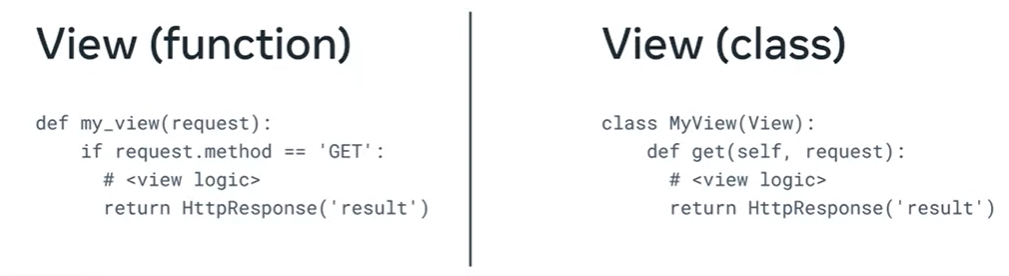

Class based views, respond with different class instance methods to HTTP requests in place of writing conditional branches, such as using if else, statements inside the same function. 

The advantage of using a class based view in this scenario, is that:
- It allows us to remove the conditional logic to check the incoming request for the type of method.
- This simplifies the code and separates the logic, making it easy to understand. 
- Another helpful aspect is the ability to have object oriented techniques, such as `mixins` or `multiple inheritance`, which factor code into reusable components.

In Django, we can extend the functionality of class based views using mixins. 

- `Mixins` are class based generic views that are flexible compared to their function based view equivalent. It can help to think of a mixin as a form of multiple inheritance.

Some common mixins developers use are `Create`, `List`, `Detail`, `Update` and `Delete`. Let's explore these briefly now. 
- Use `Create` to create a model instance:- `class Menucreate(CreateView):` 
- Use `List` to list a query set:- `class MenuList(ListView):`
- Use `Detail` to retrieve a model instance:- `class MenuDetailView(DetailView):` 
- Use `Update` to update a model instance:- `class MenuUpdateView(UpdateView):`
- use `Delete` to delete a model instance:- `class MenuDeleteview(DeleteView):`

**It's important to note that when using mixins, they can't be all used together. And in some cases it can make your code harder to read. So, it's best to use them wisely.** 

<pre id='l46'></pre>
# Setting up MySQL connection

MySQL is a popular database management system and can be used with Django when there is a heavy data load. 

Features of MySQL:
- It's open source and well-documented. 
- It's reliable and quick as data storage is done efficiently in memory. 
- It's scalable and can work with small to vast amounts of data. 
- It's secure and provides a layer of security with encrypted password protection that is flexible and verification based. 

**Let's connect to MySQL database:**

1. Firstly install `MySQL` from its official website(https://dev.mysql.com/downloads/installer/)
2. Open MySQL shell and run following command one by one:

    2.1 `CREATE DATABASE <database_name>;`
    
    2.2 `CREATE USER '<user_name>'@'localhost' IDENTIFIED BY '<password>';`
    
    2.3 `GRANT ALL ON *.* TO '<user_name>'@'localhost';`
    
    2.4 `flush privileges;`
    
3. Install database connector by command: `pip install mysqlclient`
4. Open `settings.py`(myproject) and update the `DATABASES` with following lines of code to use MySQL database
5. Run command: `python manage.py makemigrations`
6. Run command: `python manage.py migrate`

In [ ]:
# Step4: myproject/settings.py:

# Database
# https://docs.djangoproject.com/en/4.2/ref/settings/#databases

DATABASES = {
    'default': {
        'ENGINE': 'django.db.backends.mysql',
        'NAME': 'mysqldb', # database name -> step 2.1
        'HOST': '127.0.0.1', # OR 'localhost'
        'PORT': '3306',
        'USER': 'saurabh', # user name -> step 2.2
        'PASSWORD': '844120', # password -> step 2.2
    }
}

<pre id='l47'></pre>
# Testing in Django

Testing considers metrics for quality, reliability and performance. It effectively saves a lot of time for the developer.

A popular method is unit testing, which we can use to isolate a function class or method and only test that piece of code when working with unit testing, we need the following baseline information. First, the test targets granular features in your code, the smallest possible testable units, then the output of the test will be pass fail or an error.

In Django. The unit test module uses a class based approach. we add the tests inside a class that inherits a class called `TestCase` from the Django test package. 
Suppose we wrote a model called `Reservation` and want to test it. First import that `TestCase` class that inherits test case, then import the `Reservation` model.
<code>
    from django.test import TestCase
    from myapp.models import Reservation
    
    class ReservationTestCase(TestCase):
        def createReservation(self):
            Reservations.objects.create(name="John", seat_count=4, time_entry=10:10)
        
        def test_seat_count(self):
            """The seat count is ensured to be less than 8"""
            customer = Reservation.objects.get(name="John")
            # insert Assertion to test condition
</code>
    
- Once you create the tests, use the command: `python manage.py test`. 
- Additionally, we can add specific configurations to run all tests within a specific package. For example, run the command: `python manage.py test reservations`. 
- To run a specific test case use the command: `python manage.py test reservations.tests.ReservationTestCase`. 
- Or suppose we want to run a specific test method inside a test case, for example, a method to calculate the seat count. we can run the command: `python manage.py test reservations.tests.ReservationTestCase.test_seat_count`. 

It's important to know that developers generally add these test cases under one or more files created under specific app folders. In a small project it's common for developers to name the file `tests.py` and in large projects that may contain multiple test files, it's common for developers to use names like `test_models.py` and `test_views.py`.

Let's explore how we can test the model data inside a Django application using a TestCase:

1. Open `models.py`(myapp) and create model named `Reservation` with filed first name, last name and booking time
2. Check `tests.py` is present inside `myapp` or not. If not present the create file "tests.py" inside `myapp`.
3. Open `tests.py`(myapp) and write the following lines of code
4. Run command: `python manage.py makemigrations`
5. Run command: `python manage.py migrate`
6. Run command: `python manage.py test`

In [ ]:
# Step1- myapp/models.py:

from django.db import models

class Reservations(models.Model):
    first_name=models.CharField(max_length=100)
    last_name=models.CharField(max_length=100)
    booking_time=models.DateTimeField(auto_now=True)
    
    def __str__(self):
        return self.first_name

In [ ]:
# Step3- myapp/tests.py:

from django.test import TestCase

# Create your tests here.
from datetime import datetime
from .models import Reservations

class ReservationModelTest(TestCase):
    @classmethod
    def setUpTestData(cls): # method present inside the TestCase that we use to add data inside the model 
        cls.reservation = Reservations.objects.create(
            first_name = "John",
            last_name = "McDonald"
        )
        
    def test_field(self): #  to check if the first_name and the last_name that I received are in a string format
        self.assertIsInstance(self.reservation.first_name, str) # assert statements to check both first_name are of the string datatype
        self.assertIsInstance(self.reservation.last_name, str) # assert statements to check both first_name are of the string datatype
        
    def test_timestamp(self):
        self.assertIsInstance(self.reservation.booking_time, datetime) # assert statements to check if the booking_time is of the datetime datatype

# ENDD